**<font size="+3">Sensor- und Zeitreihendaten im Griff:</font>
<br>
<font size="+1">Hands-On-Tipps für robuste Speicherung und Analyse</font>**<br>
Bernward Asprion<br>
Torsten Priebe

**Dateiname: TDMI-v14.ipynb**

Jupyter-Notebook zum Vortrag am 25.06.2025 auf der TDWI München.<br>
Das Notebook wurde für diese Veranstaltung neu erstellt,<br>
trotz sorgfältige Suche, kann es noch Fehler enthalten.<br>
Fehler oder Kommentare zu dem Notebook bitte an bernward.asprion@fhstp.ac.at .

# **<font size="+3">Links zum öffnen des Notebooks über git</font>**

https://colab.research.google.com/github/drawnreb/TDWI2025/blob/main/TDMI.ipynb

# **<font size="+3">1 Vorbereitung</font>**

## **<font size="+2">1.1 Import Libraries</font>**

In [11]:
# https://www.geeksforgeeks.org/libraries-in-python/
# https://broadinstitute.github.io/2024-09-27-python-intro-lesson/libraries.html

import numpy as np               # "Numerical Python": Grundlegende Library zur drichführung mathematischer Berechnungen
import os                        # Interaktion mit dem Betriebssystem
import pandas as pd              # Grundlegend für Data Science: Bearbeitung tabularer Daten
import warnings

import matplotlib.pyplot as plt  # Graphische Darstellung numerischer Daten
from matplotlib.lines import Line2D
from matplotlib.pyplot import figure

from datetime import datetime, timedelta  # zur Verarbeitung von Datumwerten und Zeiten
from IPython.display import Image         # unterstützt die Anzeige von Objekten


## **<font size="+2">1.2 Voreinstellungen Grafiken**


In [12]:
plt.rcParams["figure.figsize"] = (12,4)         # Grafikgröße: Breite 12 Zoll, Höhe 4 Zoll
plt.rcParams.update({"axes.grid" : True})       # Mit Gitternetzlinien
#plt.rcParams['axes.spines.top'] = False
#plt.rcParams['axes.spines.right'] = False
#plt.rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
#plt.rcParams['lines.linewidth'] = 2.5

## **<font size="+2">1.3 Mount Google Drive</font>**

In [13]:
# https://medium.com/@wl8380/how-to-mount-google-drive-in-google-colab-c688ec8eccb7

from google.colab import drive   # drive: ermöglicht Interaktion mit Google Drive
drive.mount('/content/drive')    # Nach Eingabe der Authentifizierdaten wird Google Drive gemountet

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **<font size="+2">1.4 Clone git</font>**

In [14]:
if not os.path.isdir('/content/TDWI2025'):
  !git clone https://github.com/drawnreb/TDWI2025.git
  # Mit Schaltfläche "files" auf der linken Seite, lassen sich die Daten ansehen

# **<font size="+3">2 Einlesen Zeitreihen</font>**

<ul>
<li>Dateien werden jeweils in ein "Dataframe" eingelesen.
<li>DataFrame (pandas) = 2-dimensionale Datenstruktur,<br>d.h. eine Tabelle mit Zeiten und Spalten
<li>Speicherung verschiedener Datentypen (Zeitstempel, Integer, Strings) ist möglich
<li>Dateninhalt: Pegelstände von Flüssen bestimmter Messstationen
</ul>
https://www.w3schools.com/Python/pandas/pandas_dataframes.asp

## **<font size="+2">2.1 Stündliche Pegelstände Windpassing, Rainfeld, Lilienfeld</font>**

Windpassing, Rainfeld und Lilienfeld bezeichnen Wasser-Messstation an der Traisen, einem Fluss in Niederösterreich.<br>
Diese stündliche Daten können über das Land Niederösterreich aus den letzten drei Monaten über die folgenden Links bezogen werden:<br>
https://www.noe.gv.at/wasserstand/#/de/Messstellen/Details/207910/Wasserstand/3Monate<br>
https://www.noe.gv.at/wasserstand/#/de/Messstellen/Details/215574/Wasserstand/3Monate<br>
https://www.noe.gv.at/wasserstand/#/de/Messstellen/Details/207894/Wasserstand/3Monate<br>
Diese Daten über einen längerfristigen Zeitraum wurde dankenswerter Weise von der Firma SOBOS (pegelalarm.at) zur Verfügung gestellt.

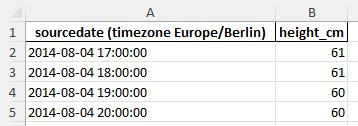

In [15]:
Image('/content/TDWI2025/images/207910-at__Traisen_Windpassing__height_hour-xlsx.JPG')

In [16]:
filenames = ['207910-at__Traisen_Windpassing__height_hour.xlsx',
             '215574-at__Gölsen_Rainfeld__height_hour.xlsx',
             '207894-at__Traisen_Lilienfeld-Marktl__height_hour.xlsx']
stations  = ['Windpassing','Rainfeld','Lilienfeld']
stations_color = ['blue', 'red', 'green']
path      = '/content/TDWI2025/data/'

dfs = {}    # Dataframes der drei Messstationen werden in einem "dictionary" gesammelt
for i, station in enumerate(stations):
  df = pd.read_excel(path + filenames[i], parse_dates = ['sourcedate (timezone Europe/Berlin)'])
  df.columns = ['timestamp', 'p']
  df.sort_values('timestamp')
  dfs[station] = df

In [17]:
for i, station in enumerate(stations):
  print(station)
  display(dfs[station].head(2))
  print()
  display(dfs[station].info())
  print()

Windpassing


timestamp     p
0 2014-08-04 17:00:00  61.0
1 2014-08-04 18:00:00  61.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86128 entries, 0 to 86127
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  86128 non-null  datetime64[ns]
 1   p          86128 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.3 MB


None


Rainfeld


timestamp    p
0 2018-09-17 14:00:00  109
1 2018-09-17 15:00:00  109


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51415 entries, 0 to 51414
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  51415 non-null  datetime64[ns]
 1   p          51415 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 803.5 KB


None


Lilienfeld


timestamp      p
0 2014-08-04 17:00:00  172.0
1 2014-08-04 18:00:00  173.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84784 entries, 0 to 84783
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  84784 non-null  datetime64[ns]
 1   p          84784 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.3 MB


None

## **<font size="+2">2.2 Wetterdaten: Einzugsgebiet Windpassing</font>**

<b>Der Spartacus-Datensatz - österreichische Wetterdaten:</b><br>
<ul>
<li>Basiert auf Bebachtungswerten von Wetterstationen
<li>Lufttemperatur (Minimum TN und Maximum TX)
<li>Niederschlag (RR) in kg/m2
<li>absoluter Sonnenscheindauer (SA) in Sekunden
<li>Daten ab 1961 mit Tagesauflösung
<li>Gegitterter Datensatz mit Kilometerauflösung

Die Spartacusdaten werden unter CC BY 4.0 zur Verfügung gestellt.<br>
Die dort abgefragten Daten wurden adaptiert.<br>
Beschreibung spartacus-Datensatz:<br>
https://data.hub.geosphere.at/dataset/spartacus-v2-1d-1km<br>
Beschreibung CC BY 4.0:<br>
https://creativecommons.org/licenses/by/4.0/<br>

<b>spartacus_windpassing_all_csv</b>:
<ul>
<li>Wurde aus den Spartacusdaten ermittelt
<li>Mittelwertbildung über alle Gitter des Einzugsgebiets Windpassing
<li>Enthält die Mittelwerte von Niederschägen (RR), Temperatur (TM) und Sonnenscheindauern (SA)
</ul>

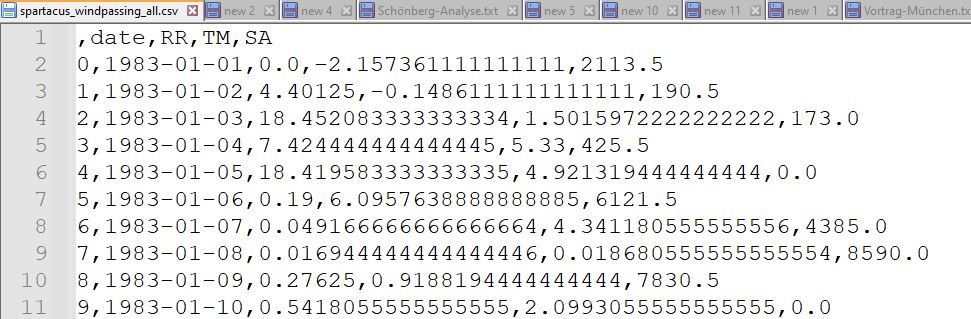

In [18]:
Image('/content/TDWI2025/images/spartacus_windpassing_all_csv.JPG')

In [19]:
path = '/content/TDWI2025/data/spartacus_windpassing_all.csv'

spartacus = pd.read_csv(path, sep = ',',  decimal= '.', parse_dates = ['date'], usecols  = [1,2,3,4])

print('Spartacus')
display(spartacus.head(2))
print()
display(spartacus.info())

Spartacus


date       RR        TM      SA
0 1983-01-01  0.00000 -2.157361  2113.5
1 1983-01-02  4.40125 -0.148611   190.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15342 entries, 0 to 15341
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    15342 non-null  datetime64[ns]
 1   RR      15342 non-null  float64       
 2   TM      15342 non-null  float64       
 3   SA      15342 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 479.6 KB


None

# **<font size="+3">3 Datenanalyse und -vorbereitung</font>**

In [20]:
#dfs_h = []
#dfs_h.append(df_windpassing_p_h)
#dfs_h.append(df_rainfeld_p_h)
#dfs_h.append(df_lilienfeld_p_h)
#titles = ['Windpassing Pegelstand pro h','Rainfeld Pegelstand pro h','Lilienfeld Pegelstand pro h']
#colors = ['blue', 'red', 'green']

## **<font size="+2">3.1 Grobanalyse: statistische Kennzahlen</font>**

In [21]:
for i, df in enumerate(dfs):
  df = dfs[stations[i]]
  print(stations[i])
  print(f'Von {min(df.timestamp).date()} bis {max(df.timestamp).date()}')
  print(df.describe(include=[np.number]))
  print()

Windpassing
Von 2014-08-04 bis 2024-10-22
                  p
count  86128.000000
mean      51.991523
std      232.916586
min      -70.000000
25%       42.000000
50%       49.000000
75%       56.000000
max    68257.000000

Rainfeld
Von 2018-09-17 bis 2024-10-21
                  p
count  51415.000000
mean     113.692658
std        9.695877
min      102.000000
25%      108.000000
50%      112.000000
75%      116.000000
max      348.000000

Lilienfeld
Von 2014-08-04 bis 2024-10-22
                  p
count  84784.000000
mean     173.536934
std       19.108209
min     -183.000000
25%      163.400000
50%      170.000000
75%      178.000000
max     1747.000000



In [22]:
df = spartacus
print('Spartacus')
print(f'Von {min(df.date).date()} bis {max(df.date).date()}')
print(df.describe(include=[np.number]))
print()

Spartacus
Von 1983-01-01 bis 2025-01-01
                 RR            TM            SA
count  15342.000000  15342.000000  15342.000000
mean       3.165305      8.285324  14905.492374
std        6.700135      7.948725  14258.217588
min        0.000000    -19.461250      0.000000
25%        0.000000      2.106389   1016.750000
50%        0.365347      8.629097  11178.750000
75%        3.429549     14.721927  26192.500000
max      209.108472     25.983889  48981.500000



## **<font size="+2">3.2 Visualisierung</font>**

### **<font size="+1">3.2.1 Pegelstände</font>**

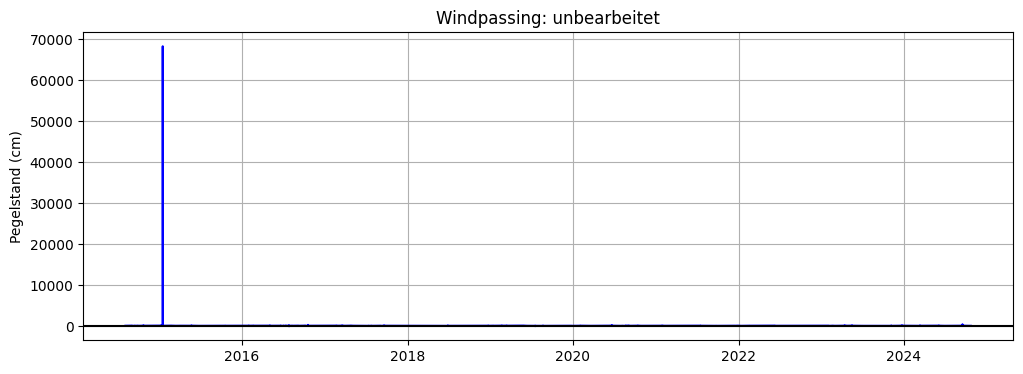

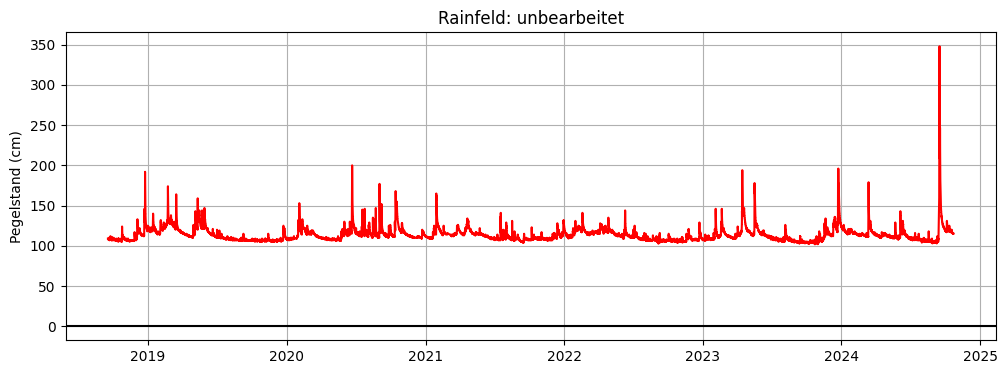

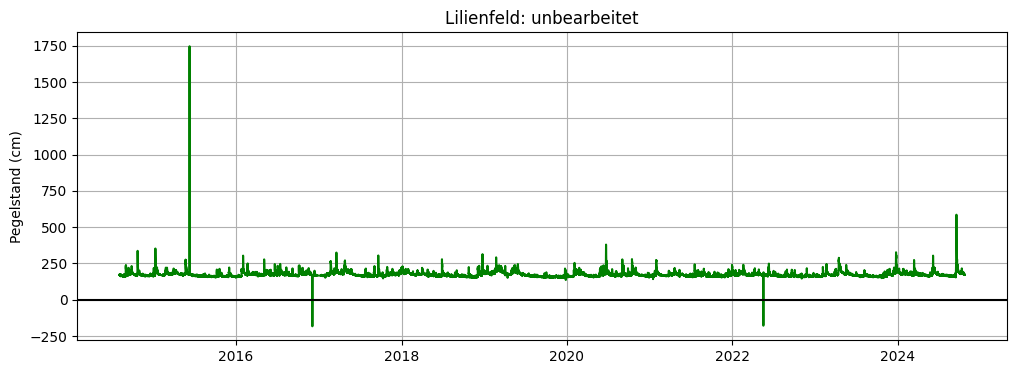

In [23]:
for i, df in enumerate(dfs):
  df = dfs[stations[i]]
  plt.figure()
  plt.plot(df.timestamp, df.p, color = stations_color[i])
  plt.ylabel('Pegelstand (cm)')
  plt.title(stations[i] + ': unbearbeitet')
  plt.axhline(0, color='black');

In [24]:
# Werte über seperat definierte Schwellenwerte werden jeweils auf NULL gesetzt.
# Auch negative Werte werden auf NULL gesetzt.
p_max = [60000, 10000, 1500]

for i, df in enumerate(dfs):
  df = dfs[stations[i]]
  df.loc[ df.p > p_max[i], 'p' ] = np.nan
  df.loc[ df.p < 0, 'p' ]        = np.nan

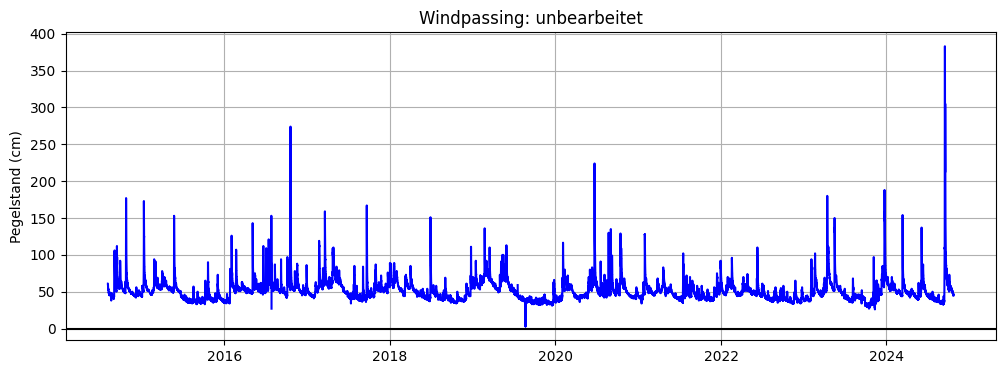

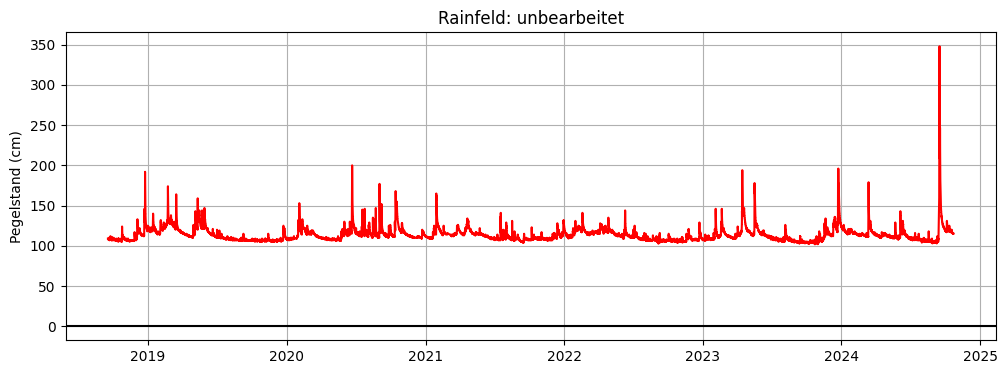

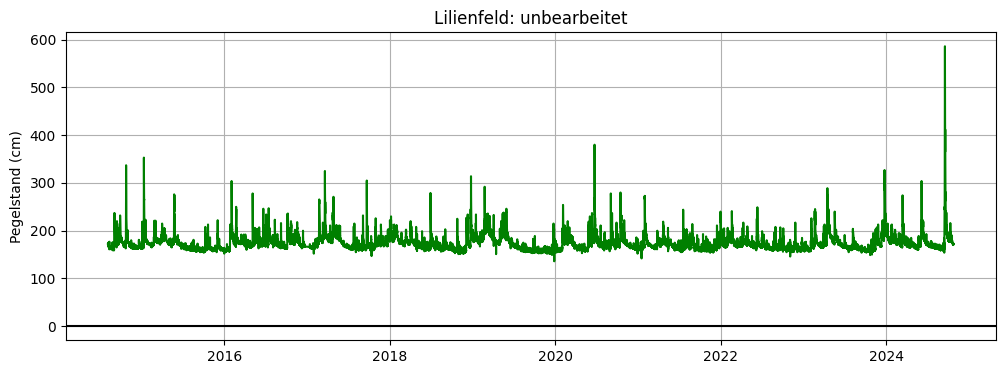

In [25]:
# Visueller Check
for i, df in enumerate(dfs):
  df = dfs[stations[i]]
  plt.figure()
  plt.plot(df.timestamp, df.p, color = stations_color[i])
  plt.ylabel('Pegelstand (cm)')
  plt.title(stations[i] + ': unbearbeitet')
  plt.axhline(0, color='black');

### **<font size="+1">3.2.1 Spartacus</font>**

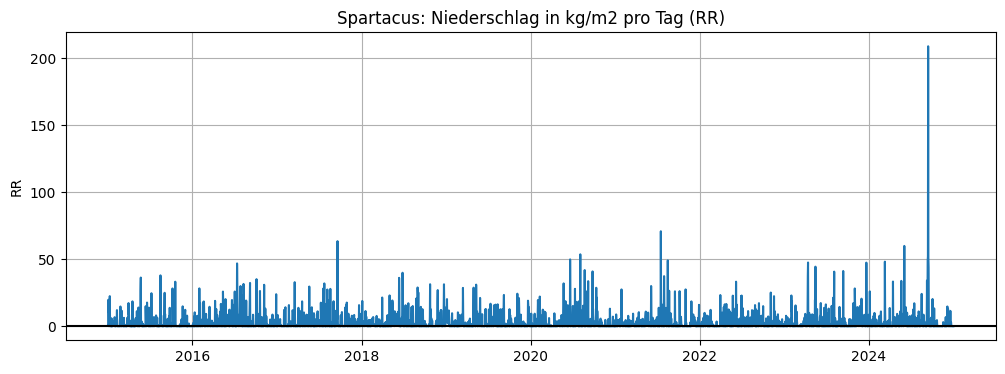

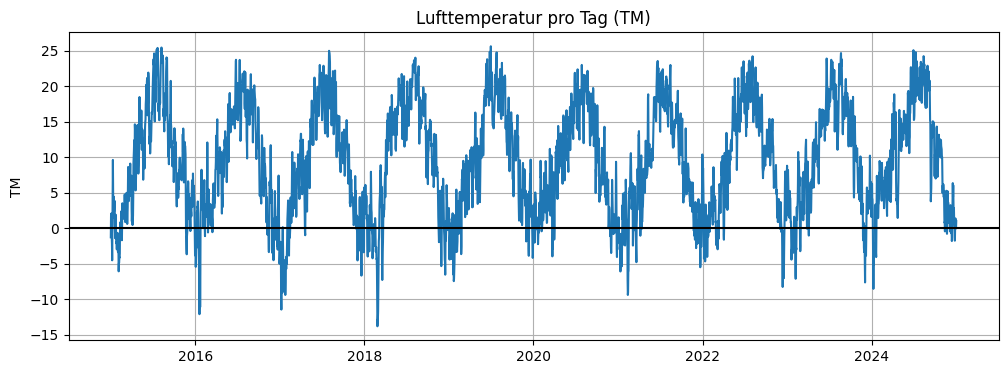

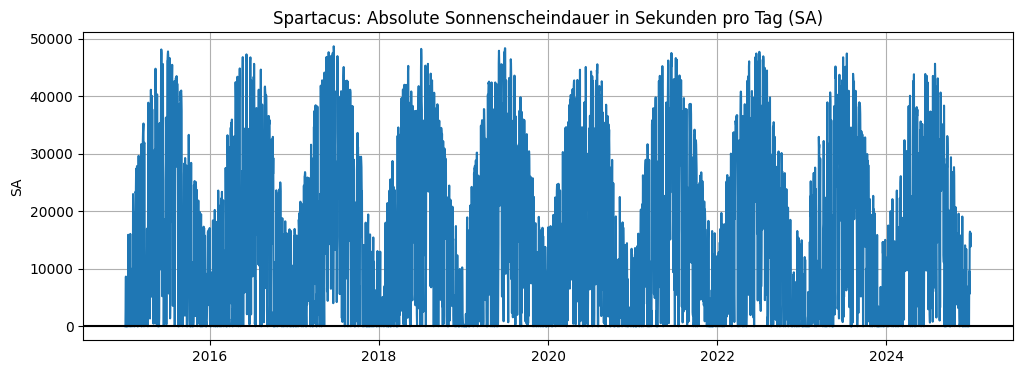

In [26]:
start = datetime(2015,1,1)
spartacus_cols = ['Spartacus: Niederschlag in kg/m2 pro Tag','Lufttemperatur pro Tag','Spartacus: Absolute Sonnenscheindauer in Sekunden pro Tag']

df = spartacus[ spartacus.date >= start ]

for i, col in enumerate(spartacus.columns[1:]):
  plt.figure()
  plt.plot(df.date, df[col])
  plt.ylabel(col)
  plt.title(spartacus_cols[i] + ' (' + col + ')')
  plt.axhline(0, color='black');

## **<font size="+2">3.3 Entfernung Sommerzeit</font>**

### **<font size="+2">3.31 Stammdaten Sommerzeit</font>**

In [27]:
# https://de.wikipedia.org/wiki/Liste_der_Sommerzeiten
summertime_wiki = ['06.04.1980, 02:00 MEZ – 28.09.1980, 03:00 MESZ',
'29.03.1981, 02:00 MEZ – 27.09.1981, 03:00 MESZ',
'28.03.1982, 02:00 MEZ – 26.09.1982, 03:00 MESZ',
'27.03.1983, 02:00 MEZ – 25.09.1983, 03:00 MESZ',
'25.03.1984, 02:00 MEZ – 30.09.1984, 03:00 MESZ',
'31.03.1985, 02:00 MEZ – 29.09.1985, 03:00 MESZ',
'30.03.1986, 02:00 MEZ – 28.09.1986, 03:00 MESZ',
'29.03.1987, 02:00 MEZ – 27.09.1987, 03:00 MESZ',
'27.03.1988, 02:00 MEZ – 25.09.1988, 03:00 MESZ',
'26.03.1989, 02:00 MEZ – 24.09.1989, 03:00 MESZ',
'25.03.1990, 02:00 MEZ – 30.09.1990, 03:00 MESZ',
'31.03.1991, 02:00 MEZ – 29.09.1991, 03:00 MESZ',
'29.03.1992, 02:00 MEZ – 27.09.1992, 03:00 MESZ',
'28.03.1993, 02:00 MEZ – 26.09.1993, 03:00 MESZ',
'27.03.1994, 02:00 MEZ – 25.09.1994, 03:00 MESZ',
'26.03.1995, 02:00 MEZ – 24.09.1995, 03:00 MESZ',
'31.03.1996, 02:00 MEZ – 27.10.1996, 03:00 MESZ',
'30.03.1997, 02:00 MEZ – 26.10.1997, 03:00 MESZ',
'29.03.1998, 02:00 MEZ – 25.10.1998, 03:00 MESZ',
'28.03.1999, 02:00 MEZ – 31.10.1999, 03:00 MESZ',
'26.03.2000, 02:00 MEZ – 29.10.2000, 03:00 MESZ',
'25.03.2001, 02:00 MEZ – 28.10.2001, 03:00 MESZ',
'31.03.2002, 02:00 MEZ – 27.10.2002, 03:00 MESZ',
'30.03.2003, 02:00 MEZ – 26.10.2003, 03:00 MESZ',
'28.03.2004, 02:00 MEZ – 31.10.2004, 03:00 MESZ',
'27.03.2005, 02:00 MEZ – 30.10.2005, 03:00 MESZ',
'26.03.2006, 02:00 MEZ – 29.10.2006, 03:00 MESZ',
'25.03.2007, 02:00 MEZ – 28.10.2007, 03:00 MESZ',
'30.03.2008, 02:00 MEZ – 26.10.2008, 03:00 MESZ',
'29.03.2009, 02:00 MEZ – 25.10.2009, 03:00 MESZ',
'28.03.2010, 02:00 MEZ – 31.10.2010, 03:00 MESZ',
'27.03.2011, 02:00 MEZ – 30.10.2011, 03:00 MESZ',
'25.03.2012, 02:00 MEZ – 28.10.2012, 03:00 MESZ',
'31.03.2013, 02:00 MEZ – 27.10.2013, 03:00 MESZ',
'30.03.2014, 02:00 MEZ – 26.10.2014, 03:00 MESZ',
'29.03.2015, 02:00 MEZ – 25.10.2015, 03:00 MESZ',
'27.03.2016, 02:00 MEZ – 30.10.2016, 03:00 MESZ',
'26.03.2017, 02:00 MEZ – 29.10.2017, 03:00 MESZ',
'25.03.2018, 02:00 MEZ – 28.10.2018, 03:00 MESZ',
'31.03.2019, 02:00 MEZ – 27.10.2019, 03:00 MESZ',
'29.03.2020, 02:00 MEZ – 25.10.2020, 03:00 MESZ',
'28.03.2021, 02:00 MEZ – 31.10.2021, 03:00 MESZ',
'27.03.2022, 02:00 MEZ – 30.10.2022, 03:00 MESZ',
'26.03.2023, 02:00 MEZ – 29.10.2023, 03:00 MESZ',
'31.03.2024, 02:00 MEZ – 27.10.2024, 03:00 MESZ',
'30.03.2025, 02:00 MEZ – 26.10.2025, 03:00 MESZ',
'29.03.2026, 02:00 MEZ – 25.10.2026, 03:00 MESZ',
'28.03.2027, 02:00 MEZ – 31.10.2027, 03:00 MESZ',
'26.03.2028, 02:00 MEZ – 29.10.2028, 03:00 MESZ',
'25.03.2029, 02:00 MEZ – 28.10.2028, 03:00 MESZ'  ]

In [28]:
# Liste mit Sommerzeiten wird in DataFrame summertimes eingefügt
st_year = []
st_from = []
st_to   = []
for summertime in summertime_wiki:
  st_year.append( int(summertime[6:10]))
  st_from.append( datetime( int(summertime[ 6:10]), int(summertime[ 3: 5]), int(summertime[ 0: 2]), int(summertime[12:14]) ))
  st_to.append  ( datetime( int(summertime[30:34]), int(summertime[27:29]), int(summertime[24:26]), int(summertime[36:38]) ))
summertimes = pd.DataFrame( {'year': st_year, 'start': st_from, 'end': st_to} )
summertimes.head(5)

year               start                 end
0  1980 1980-04-06 02:00:00 1980-09-28 03:00:00
1  1981 1981-03-29 02:00:00 1981-09-27 03:00:00
2  1982 1982-03-28 02:00:00 1982-09-26 03:00:00
3  1983 1983-03-27 02:00:00 1983-09-25 03:00:00
4  1984 1984-03-25 02:00:00 1984-09-30 03:00:00

### **<font size="+2">3.32 Entfernung Sommerzeit</font>**

In [29]:
# Analyse Beginn Sommerzeit, am Beispiel Windpassing
for i, df in enumerate(dfs):
  if stations[i] == 'Windpassing':      # bei den anderen Messstationen ist das ähnlich
    df = dfs[stations[i]]
    print(stations[i])
    for st_start in summertimes.start:
      start = st_start - pd.Timedelta(hours=1)
      stop  = st_start + pd.Timedelta(hours=1)
      temp = df [ (df.timestamp >= start) & (df.timestamp <= stop ) ]
      if len(temp) > 0:
        print(temp)
    print()

Windpassing
               timestamp     p
4970 2015-03-29 01:00:00  54.0
                timestamp     p
12990 2016-03-27 01:00:00  56.0
12991 2016-03-27 03:00:00  56.0
                timestamp     p
21313 2017-03-26 01:00:00  65.0
21314 2017-03-26 03:00:00  65.1
                timestamp     p
29620 2018-03-25 01:00:00  55.0
29621 2018-03-25 03:00:00  55.0
                timestamp     p
38327 2019-03-31 01:00:00  62.0
38328 2019-03-31 03:00:00  62.0
                timestamp     p
46725 2020-03-29 01:00:00  45.0
46726 2020-03-29 03:00:00  45.0
                timestamp     p
55243 2021-03-28 03:00:00  67.0
                timestamp     p
63918 2022-03-27 01:00:00  46.0
63919 2022-03-27 03:00:00  46.0
                timestamp     p
72570 2023-03-26 01:00:00  45.0
72571 2023-03-26 03:00:00  45.0
                timestamp     p
81330 2024-03-31 01:00:00  48.0
81331 2024-03-31 03:00:00  48.0



In [30]:
# Analyse Ende Sommerzeit, am Beispiel Windpassing
for i, df in enumerate(dfs):
  if stations[i] == 'Windpassing':      # bei den anderen Messstationen ist das ähnlich
    df = dfs[stations[i]]
    print(stations[i])
    for st_end in summertimes.end:
      start = st_end - pd.Timedelta(hours=2)
      stop  = st_end + pd.Timedelta(hours=2)
      temp = df [ (df.timestamp >= start) & (df.timestamp <= stop ) ]
      if len(temp) > 0:
        print(temp)
    print()

Windpassing
               timestamp     p
1676 2014-10-26 01:00:00  82.0
1677 2014-10-26 02:00:00  81.0
1678 2014-10-26 02:00:00  80.0
1679 2014-10-26 03:00:00  79.0
1680 2014-10-26 04:00:00  77.0
1681 2014-10-26 05:00:00  80.0
               timestamp     p
9692 2015-10-25 01:00:00  50.0
9693 2015-10-25 02:00:00  49.0
9694 2015-10-25 02:00:00  49.0
9695 2015-10-25 03:00:00  49.0
9696 2015-10-25 04:00:00  49.0
9697 2015-10-25 05:00:00  49.0
                timestamp     p
17905 2016-10-30 01:00:00  56.0
17906 2016-10-30 02:00:00  56.0
17907 2016-10-30 02:00:00  56.0
17908 2016-10-30 03:00:00  56.0
17909 2016-10-30 04:00:00  56.0
17910 2016-10-30 05:00:00  56.0
                timestamp     p
26208 2017-10-29 01:00:00  62.0
26209 2017-10-29 02:00:00  61.0
26210 2017-10-29 02:00:00  61.0
26211 2017-10-29 03:00:00  60.0
26212 2017-10-29 04:00:00  60.0
26213 2017-10-29 05:00:00  60.0
                timestamp     p
34723 2018-10-28 01:00:00  39.0
34724 2018-10-28 02:00:00  39.0
34725 2018

In [31]:
# Berechung zeitlicher Abstand zum nächsten Datensatz
for i, df in enumerate(dfs):
  df = dfs[stations[i]]
  df['hourdistance'] = df.timestamp.diff(1).shift(-1) / np.timedelta64(1, 'h')
# check
df = dfs[stations[0]]
df[ (df.timestamp >= datetime(2018,10,28,1,0,0)) & (df.timestamp <= datetime(2018,10,28,3,0,0))]

timestamp     p  hourdistance
34723 2018-10-28 01:00:00  39.0           1.0
34724 2018-10-28 02:00:00  39.0           0.0
34725 2018-10-28 02:00:00  39.0           1.0
34726 2018-10-28 03:00:00  39.0           1.0

In [32]:
# Zeitstempel ohne Sommerzeit = timestamp_korr
for i, df in enumerate(dfs):
  df = dfs[stations[i]]
  df['timestamp_korr'] = df.timestamp
  for index, row in summertimes.iterrows():
    st_start = row.start
    st_end   = row.end - pd.Timedelta(hours=1)
    bool = (df.timestamp_korr >= st_start) &  (df.timestamp_korr < st_end )
    df.loc[bool, 'timestamp_korr'] = df.timestamp_korr - pd.Timedelta(hours=1)
    bool = (df.timestamp_korr == st_end) & (round(df.hourdistance,0) == 0)
    df.loc[bool, 'timestamp_korr'] = df.timestamp_korr - pd.Timedelta(hours=1)
  df = df.drop('hourdistance', axis=1)     # wird nicht mehr gebraucht
  dfs[stations[i]] = df.copy()

In [33]:
# Check
df = dfs[stations[1]]
print(stations[1])
df.loc[ (df.timestamp >= datetime(2018,10,28,1,0,0)) & (df.timestamp <= datetime(2018,10,28,3,0,0))][['timestamp','timestamp_korr','p']]

Rainfeld


timestamp      timestamp_korr      p
941 2018-10-28 01:00:00 2018-10-28 00:00:00  109.0
942 2018-10-28 02:00:00 2018-10-28 01:00:00  109.0
943 2018-10-28 02:00:00 2018-10-28 02:00:00  109.0
944 2018-10-28 03:00:00 2018-10-28 03:00:00  109.0

## **<font size="+2">3.4 Zeitstempel als Index</font>**

In [34]:
# Check auf Duplikate von timestamp_korr
for i, df in enumerate(dfs):
  df = dfs[stations[i]]
  if (df.timestamp_korr.duplicated().any()):
    print(f'{stations[i]}: timestamp_korr enthält Duplikate')
  else:
    print(f'{stations[i]}: timestamp_korr enthält KEINE Duplikate')
  print()

Windpassing: timestamp_korr enthält KEINE Duplikate

Rainfeld: timestamp_korr enthält KEINE Duplikate

Lilienfeld: timestamp_korr enthält KEINE Duplikate



In [35]:
for i, df in enumerate(dfs):
  df = dfs[stations[i]]
  df.set_index('timestamp_korr', inplace=True)
  df = df.drop('timestamp', axis=1)
  df.index.names = ['index']
  dfs[stations[i]] = df.copy()

#Check
df = dfs[stations[2]]
df.sample(3)

p
index                     
2016-08-20 12:00:00  170.0
2016-12-17 15:00:00  170.0
2022-11-21 09:00:00  164.0

## **<font size="+2">3.5 Ausreißer</font>**

### **<font size="+2">3.51 (2-)Sigma-Regel</font>**

https://www.klett.de/inhalt/media_fast_path/32/735310_Stochastik_Normalverteilung_und_Sigma_Regeln.pdf

In [36]:
k = 2   # Festlegung wieviele Standardabweichungen um Mittelwert ein Ausreißer kennzeichnen
means = []
sds   = []
sigma_mins = []
sigma_maxs = []

for i, df in enumerate(dfs):
  df = dfs[stations[i]]
  mean = np.mean(df.p, axis=0)
  sd   = np.std(df.p, axis=0)
  sigma_min = mean - k*sd
  sigma_max = mean + k*sd
  means.append(mean)
  sds.append(sd)
  sigma_mins.append(sigma_min)
  sigma_maxs.append(sigma_max)

  df['sigmaregel'] = False
  df.loc[ df.p < sigma_mins[i], 'sigmaregel' ] = True
  df.loc[ df.p > sigma_maxs[i], 'sigmaregel' ] = True

  print(stations[i])
  print(f'Anteil Datenpunkte außerhalb {k} Sigma: {round( df[ df.sigmaregel == True].shape[0] / df.shape[0]*100, 2) }% ')
  print()

Windpassing
Anteil Datenpunkte außerhalb 2 Sigma: 3.32% 

Rainfeld
Anteil Datenpunkte außerhalb 2 Sigma: 2.79% 

Lilienfeld
Anteil Datenpunkte außerhalb 2 Sigma: 3.43% 



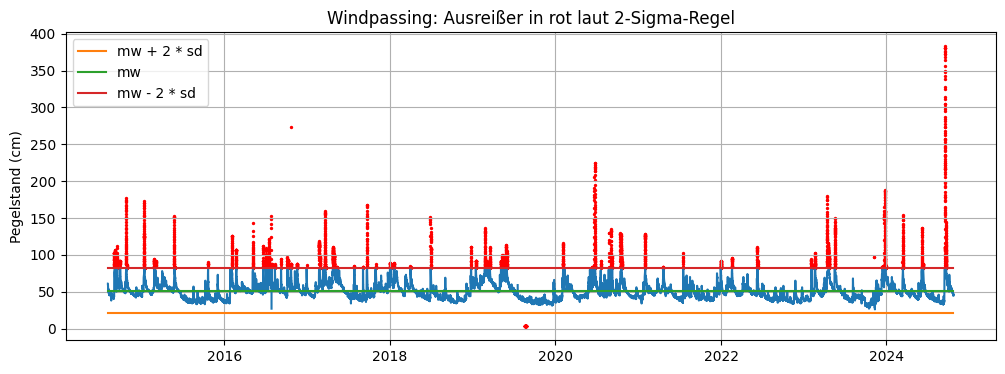

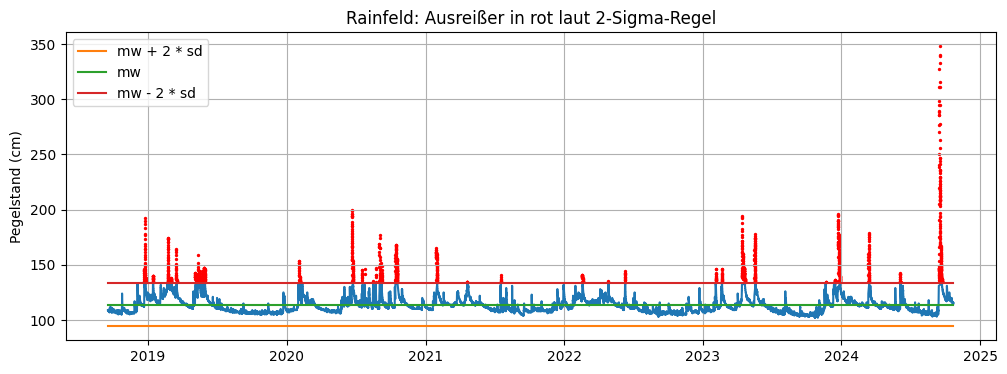

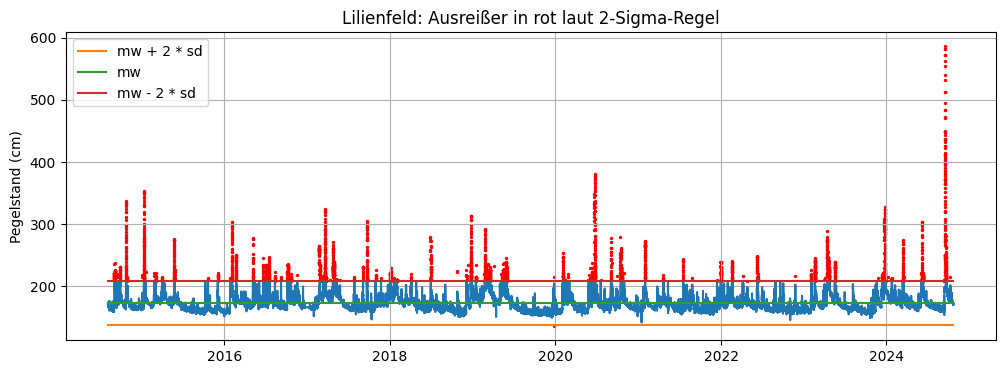

In [37]:
for i, df in enumerate(dfs):
  df = dfs[stations[i]]
  plt.figure()
  plt.plot(df[df.sigmaregel == False ].index, df[df.sigmaregel == False ].p)
  plt.scatter(df[df.sigmaregel == True ].index, df[df.sigmaregel == True ].p, color = 'red', s=2)

  plt.plot( [ min(df.index), max(df.index) ], [sigma_mins[i], sigma_mins[i]], label = 'mw + 2 * sd' )
  plt.plot( [ min(df.index), max(df.index) ], [means[i], means[i]], label = 'mw' )
  plt.plot( [ min(df.index), max(df.index) ], [sigma_maxs[i], sigma_maxs[i]], label = 'mw - 2 * sd' )

  plt.ylabel('Pegelstand (cm)')
  plt.title(stations[i] + ': Ausreißer in rot laut ' +str(k)+ '-Sigma-Regel')
  #plt.axhline(0, color='black')
  plt.legend();

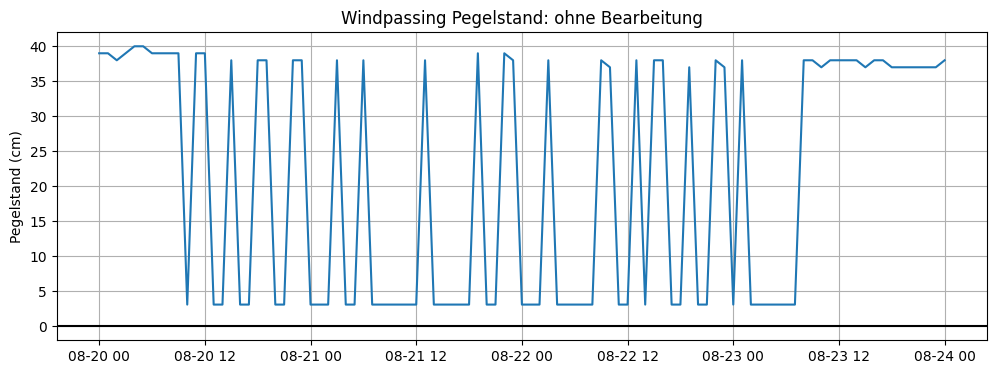

In [38]:
# Analyse Windpassing: Werte 3.1
station = 'Windpassing'
date_from = datetime(2019,8,20)
date_to = datetime(2019,8,24)

df = dfs[station]
df = df[ (df.index >= date_from) & (df.index <= date_to)]

plt.figure()
plt.plot(df.index, df.p)
plt.ylabel('Pegelstand (cm)')
plt.title('Windpassing Pegelstand: ohne Bearbeitung')
plt.axhline(0, color='black');

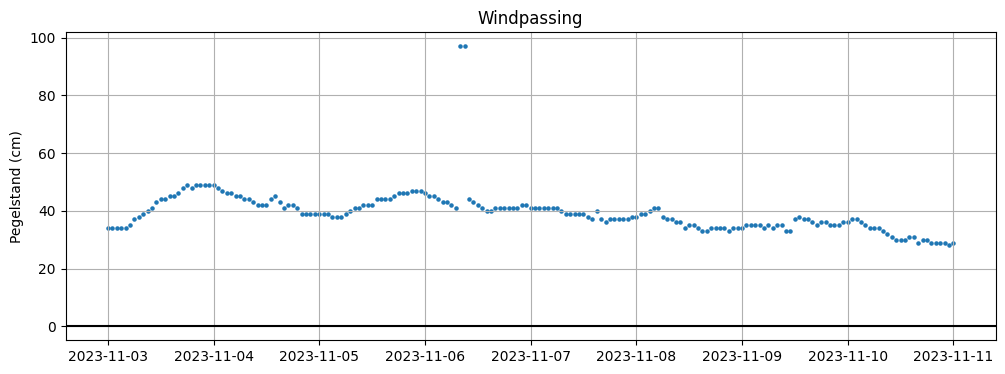

In [39]:
# Analyse Windpassing: Ausreißer am 06.11.2025
station = 'Windpassing'
date_from = datetime(2023,11,3)
date_to = datetime(2023,11,11)
df = dfs[station]
df = df[ (df.index >= date_from) & (df.index <= date_to)]

plt.scatter(df.index, df.p, s=5)
plt.ylabel('Pegelstand (cm)')
plt.title(station)
plt.axhline(0, color='black');

In [40]:
# Entfernung einzelner unplausibler Werte
station = 'Windpassing'
dfs[station].loc[dfs[station].p == 3.1, 'p']  = np.nan
dfs[station].loc[ (dfs[station].p > 250) & (dfs[station].index <= datetime(2018,1,1)), 'p' ] = np.nan
dfs[station].loc[ (dfs[station].p > 80) & (dfs[station].index  <= datetime(2023,11,7)) & (dfs[station].index >= datetime(2023,11,6)), 'p' ] = np.nan
station = 'Lilienfeld'
dfs[station].loc[dfs[station].p < sigma_mins[2], 'p']  = np.nan

### **<font size="+2">3.52 Ausreißer: schnelle Wertänderung**

Idee: Ausreißer sind Werte wenn der Pegelanstieg pro Stunde zum Vorgängen und zum Nachfolger unter einem Schwellwert liegt.

In [41]:
for i in range(len(dfs)):
  df = dfs[stations[i]]
  df['timestamp'] = df.index
  df['hourdistance'] = df.timestamp.diff(1).shift(-1) / np.timedelta64(1, 'h')
  dfs[stations[i]] = df.copy()

In [42]:
thresholds = [30, 30, 30]   # in Einheit cm/Stunde

# Wegen möglicher Datenlücken wird Wert- und Zeitänderung berücksichtigt
for i in range(len(dfs)):
  df = dfs[stations[i]]
  df['p_diff'] = ( df.p.diff().shift(-1).abs() + df.p.diff().abs() ) / (df.hourdistance.shift(-1) + df.hourdistance)
  df['ausreisser'] =  [True if x > thresholds[i] else False for x in df.p_diff]
  dfs[stations[i]] = df.copy()

In [43]:
display(dfs[stations[1]][0:3])
display(dfs[stations[2]][0:3])

p  sigmaregel           timestamp  hourdistance  \
index                                                                      
2018-09-17 13:00:00  109.0       False 2018-09-17 13:00:00           1.0   
2018-09-17 14:00:00  109.0       False 2018-09-17 14:00:00           1.0   
2018-09-17 15:00:00  109.0       False 2018-09-17 15:00:00           1.0   

                     p_diff  ausreisser  
index                                    
2018-09-17 13:00:00     NaN       False  
2018-09-17 14:00:00     0.0       False  
2018-09-17 15:00:00     0.0       False

p  sigmaregel           timestamp  hourdistance  \
index                                                                      
2014-08-04 16:00:00  172.0       False 2014-08-04 16:00:00           1.0   
2014-08-04 17:00:00  173.0       False 2014-08-04 17:00:00           1.0   
2014-08-04 18:00:00  173.0       False 2014-08-04 18:00:00           1.0   

                     p_diff  ausreisser  
index                                    
2014-08-04 16:00:00     NaN       False  
2014-08-04 17:00:00     0.5       False  
2014-08-04 18:00:00     1.0       False

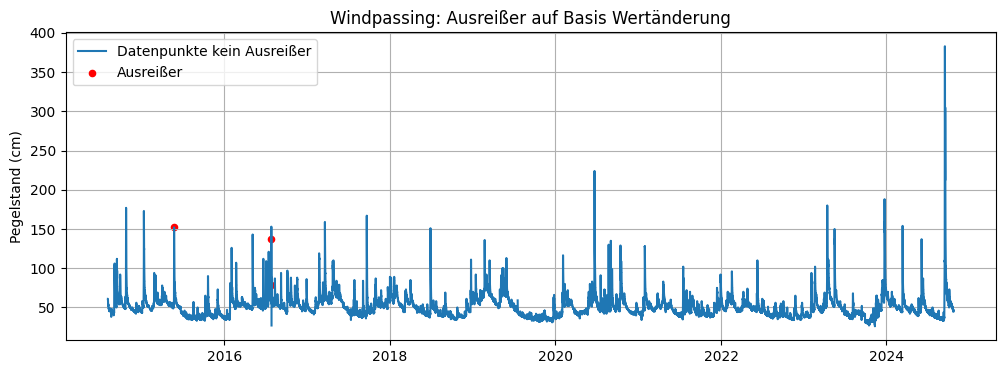

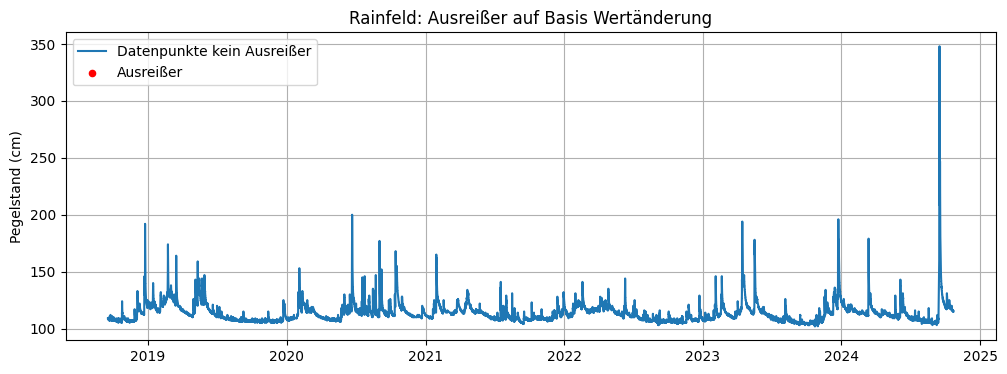

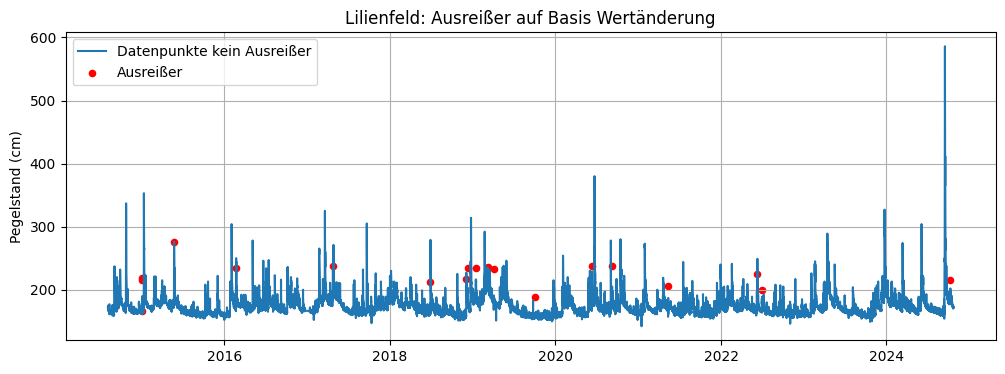

In [44]:
for i in range(len(dfs)):
  df = dfs[stations[i]]
  plt.figure()
  plt.plot(df[df.ausreisser == False ].index, df[df.ausreisser == False ].p, label = 'Datenpunkte kein Ausreißer')
  plt.scatter(df[df.ausreisser == True ].index, df[df.ausreisser == True ].p, color = 'red', s=20, label = 'Ausreißer')
  plt.ylabel('Pegelstand (cm)')
  plt.title(stations[i] + ': Ausreißer auf Basis Wertänderung')
  #plt.axhline(0, color='black')
  plt.legend();

In [45]:
# Entfernung nicht mehr gebrauchter Spalten
cols = ['ausreisser', 'p_diff', 'timestamp', 'sigmaregel']
for i in range(len(dfs)):
  df = dfs[stations[i]]
  df = df.drop(cols, axis=1)
  dfs[stations[i]] = df.copy()

## **<font size="+2">3.6 Datenlücken</font>**

### **<font size="+2">3.61 Analyse Datenlücken**

Eine Datenlücke zeigt sich durch eine Wert bei hourdistance von größer als 1, bspw:

In [46]:
station = 'Windpassing'
dfs[station][ dfs[station].hourdistance > 1 ].head()

p  hourdistance
index                                  
2014-09-05 14:00:00  64.0           2.0
2014-09-05 19:00:00  63.0           2.0
2014-09-05 23:00:00  62.0           2.0
2014-09-06 05:00:00  60.0           4.0
2014-09-06 12:00:00  59.0           2.0

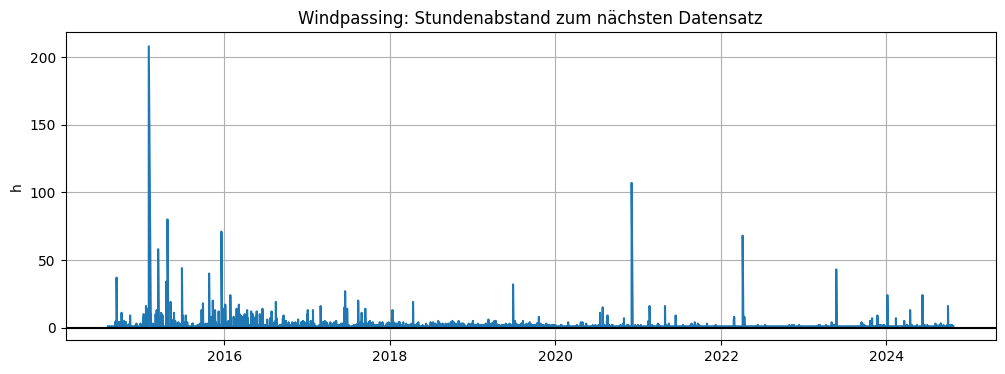

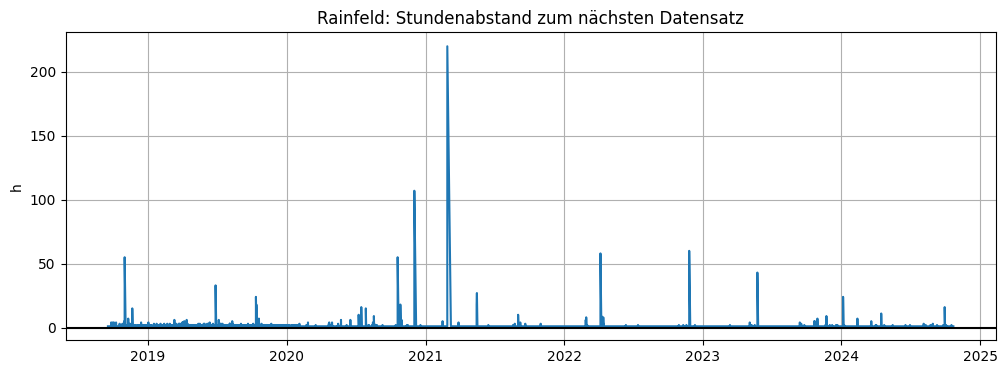

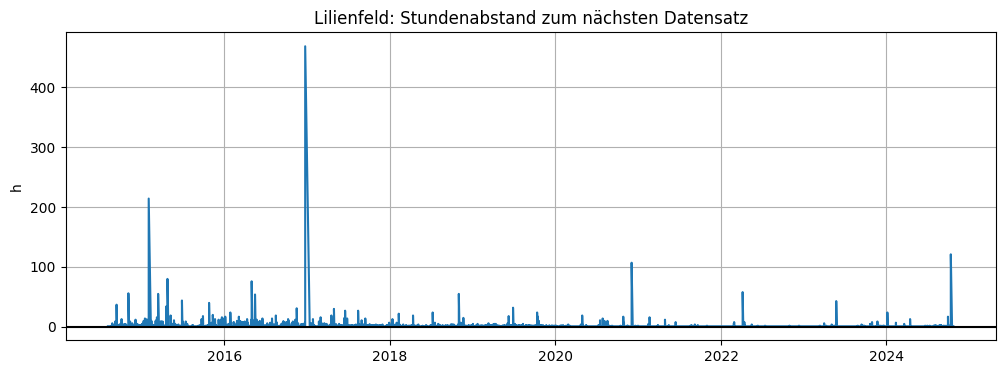

In [47]:
for i in range(len(dfs)):
  df = dfs[stations[i]]
  plt.figure()
  plt.plot(df.index, df.hourdistance)
  plt.ylabel('h')
  plt.title(stations[i] +  ': Stundenabstand zum nächsten Datensatz')
  plt.axhline(0, color='black');

In [48]:
for i in range(len(dfs)):
  df = dfs[stations[i]]
  timespan = max(df.index) - min(df.index)
  timespan_h = timespan / np.timedelta64(1, 'h')
  portion = round( df.shape[0] / timespan_h * 100, 2)
  #print(max(df.index))
  #print(df.shape)
  #print(timespan_h)
  print(f'{stations[i]}: Anteil vorhandene Daten: {portion}%')

Windpassing: Anteil vorhandene Daten: 96.16%
Rainfeld: Anteil vorhandene Daten: 96.23%
Lilienfeld: Anteil vorhandene Daten: 94.66%


In [49]:
# Entfernung nicht mehr gebrauchter Spalten
cols = ['hourdistance']
for i in range(len(dfs)):
  df = dfs[stations[i]]
  df = df.drop(cols, axis=1)
  dfs[stations[i]] = df.copy()

### **<font size="+2">3.62 Lineare Interpolation**

In [50]:
# ERezeugung aller Stunden-Zeitstempel im Zeitraum der einzelnen Zeitreihen
data_ranges = []
for i in range(len(dfs)):
  data_ranges.append( pd.date_range(start=min(df.index), end=max(df.index), freq="h") )

In [51]:
for i in range(len(dfs)):
  df = dfs[stations[i]]
  df = df.reindex(data_ranges[i])
  dfs[stations[i]] = df.copy()

In [52]:
# Beispiel
dfs[stations[0]][ dfs[stations[0]].index >= datetime(2014,9,5,13)][1:4]

p
2014-09-05 14:00:00  64.0
2014-09-05 15:00:00   NaN
2014-09-05 16:00:00  64.0

In [53]:
for i in range(len(dfs)):
  df = dfs[stations[i]]
  # hier erfolgt die lineare Interpolation
  df = df.interpolate(limit = 1000)
  # Datensätze am Rand mit NULL-Werten werden entfernt
  first_idx = df.first_valid_index()
  last_idx = df.last_valid_index()
  df = df.loc[first_idx:last_idx]
  dfs[stations[i]] = df.copy()

In [54]:
# Beispiel
dfs[stations[0]][ dfs[stations[0]].index >= datetime(2014,9,5,13)][1:4]

p
2014-09-05 14:00:00  64.0
2014-09-05 15:00:00  64.0
2014-09-05 16:00:00  64.0

## **<font size="+2">3.7 Resampling</font>**

**Vergrößerung der zeitlichen Auflösung**

In [55]:
dfs_day   = {}    # Dataframes der drei Messstationen werden in einem "dictionary" gesammelt
dfs_month = {}    # Dataframes der drei Messstationen werden in einem "dictionary" gesammelt

for i in range(len(dfs)):
  df = dfs[stations[i]]
  df = df.resample(rule='D').mean()
  dfs_day[stations[i]] = df.copy()
  df = df.resample(rule='MS').mean()
  dfs_month[stations[i]] = df.copy()

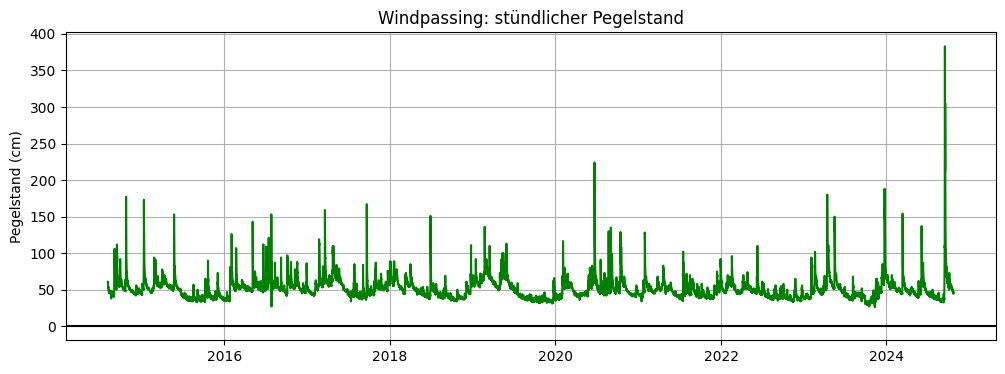

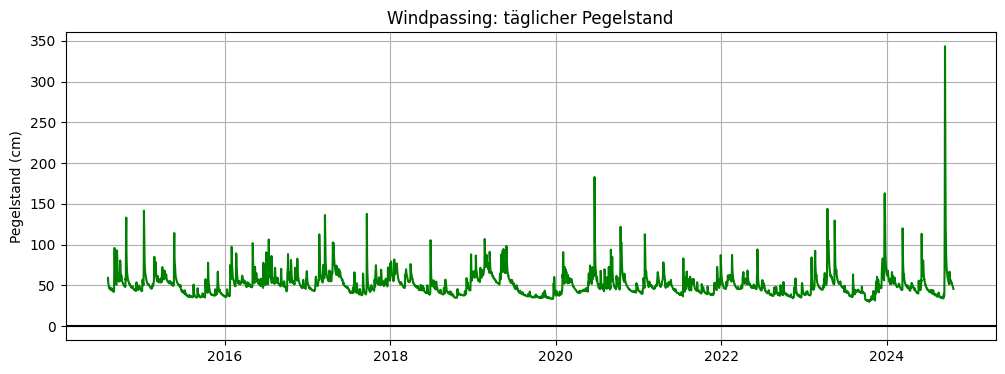

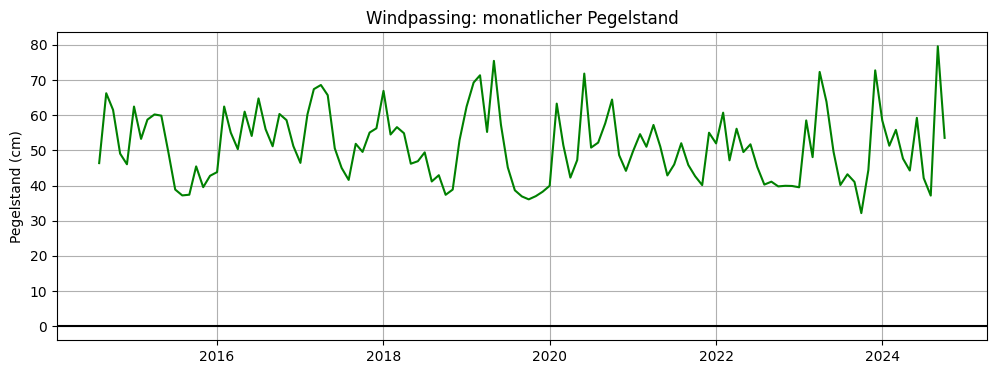

In [56]:
station = 'Windpassing'

plt.figure()
df = dfs[station]
plt.plot(df.index, df.p, color = stations_color[i])
plt.ylabel('Pegelstand (cm)')
plt.title(station + ': stündlicher Pegelstand')
plt.axhline(0, color='black');

plt.figure()
df = dfs_day[station]
plt.plot(df.index, df.p, color = stations_color[i])
plt.ylabel('Pegelstand (cm)')
plt.title(station + ': täglicher Pegelstand')
plt.axhline(0, color='black');

plt.figure()
df = dfs_month[station]
plt.plot(df.index, df.p, color = stations_color[i])
plt.ylabel('Pegelstand (cm)')
plt.title(station + ': monatlicher Pegelstand')
plt.axhline(0, color='black');

**Verkleinerung der zeitlichen Auflösung (upsampling)**

In [57]:
spartacus.set_index('date', inplace=True)

In [58]:
spartacus_h = spartacus.resample('h').mean()
spartacus_h.index.names = ['index']
spartacus_h = spartacus_h.ffill()
spartacus_h.RR = spartacus_h.RR / 24

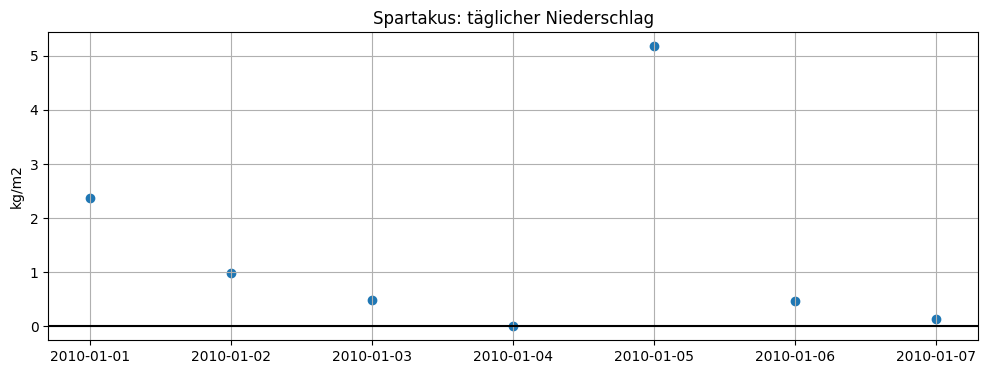

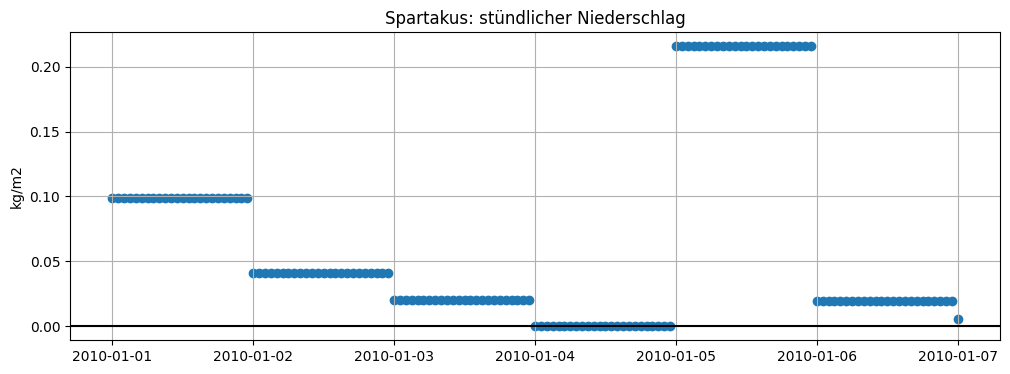

In [59]:
df_start = datetime(2010,1,1)
df_end   = datetime(2010,1,7)

df = spartacus
df = df[ (df.index >= df_start) & (df.index <= df_end) ]

plt.figure()
plt.scatter(df.index, df.RR)
plt.ylabel('kg/m2')
plt.title('Spartakus: täglicher Niederschlag')
plt.axhline(0, color='black');

df = spartacus_h
df = df[ (df.index >= df_start) & (df.index <= df_end) ]

plt.figure()
plt.scatter(df.index, df.RR)
plt.ylabel('kg/m2')
plt.title('Spartakus: stündlicher Niederschlag')
plt.axhline(0, color='black');

# **<font size="+3">4 Stationarität und Autokorrelation</font>**

## **<font size="+2">4.1 Stationarität</font>**

In [ ]:
from statsmodels.tsa.stattools import adfuller  # AFD-test für Stationarität
from statsmodels.tsa.stattools import kpss      # KPSS-test für Stationaritä

### **<font size="+2">4.11 ADF test</font>**

Augmented Dickey-Fuller test<br>
https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html

In [ ]:
def adf_test(series, station, resolution):
  adf = adfuller(series)
  print(station + ' ' + resolution)
  print('p-Wert: ',adf[1])
  if adf[1] < 0.05:
    print('Zeitreihe wird aufgrund adf-Test als stationär angenommen.')
  else:
    print('Zeitreihe wird aufgrund adf-Test als NICHT stationär angenommen.')
  print()

In [ ]:
for i in range(len(dfs)):
  adf_test(dfs[stations[i]].p, stations[i], 'Stundenwerte')

Windpassing Stundenwerte
p-Wert:  6.532512280733947e-30
Zeitreihe wird aufgrund adf-Test als stationär angenommen.

Rainfeld Stundenwerte
p-Wert:  2.0039271350608014e-24
Zeitreihe wird aufgrund adf-Test als stationär angenommen.

Lilienfeld Stundenwerte
p-Wert:  3.3437326029706664e-30
Zeitreihe wird aufgrund adf-Test als stationär angenommen.



In [ ]:
for i in range(len(dfs_day)):
  adf_test(dfs_day[stations[i]].p, stations[i], 'Tageswerte')

Windpassing Tageswerte
p-Wert:  7.956680062930783e-19
Zeitreihe wird aufgrund adf-Test als stationär angenommen.

Rainfeld Tageswerte
p-Wert:  1.562167987821769e-18
Zeitreihe wird aufgrund adf-Test als stationär angenommen.

Lilienfeld Tageswerte
p-Wert:  1.0635553259402075e-17
Zeitreihe wird aufgrund adf-Test als stationär angenommen.



In [ ]:
for i in range(len(dfs_month)):
  adf_test(dfs_month[stations[i]].p, stations[i], 'Monatswerte')

Windpassing Monatswerte
p-Wert:  1.3070646205607772e-07
Zeitreihe wird aufgrund adf-Test als stationär angenommen.

Rainfeld Monatswerte
p-Wert:  1.250428513815058e-05
Zeitreihe wird aufgrund adf-Test als stationär angenommen.

Lilienfeld Monatswerte
p-Wert:  1.685664021840539e-11
Zeitreihe wird aufgrund adf-Test als stationär angenommen.



In [ ]:
adf_test(spartacus.RR, 'Spartactus RR', 'Tageswerte')

Spartactus Tageswerte
p-Wert:  0.0
Zeitreihe wird aufgrund adf-Test als stationär angenommen.



In [ ]:
adf_test(spartacus.TM, 'Spartactus TM', 'Tageswerte')

Spartactus TM Tageswerte
p-Wert:  1.122047461111094e-14
Zeitreihe wird aufgrund adf-Test als stationär angenommen.



In [ ]:
adf_test(spartacus.TM, 'Spartactus SA', 'Tageswerte')

Spartactus SA Tageswerte
p-Wert:  1.122047461111094e-14
Zeitreihe wird aufgrund adf-Test als stationär angenommen.



### **<font size="+2">4.12 KPSS test</font>**

Kwiatkowski-Phillips-Schmidt-Shin test<br>
https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.kpss.html

In [ ]:
def kpss_test(series, station, resolution):
  kpss_test = kpss(series, regression = "c")
  print(station + ' ' + resolution)
  print('p-Wert (wenn 0.1, dann mind. 0.1): ',kpss_test[1])
  if kpss_test[1] < 0.05:
    print('Zeitreihe wird aufgrund kpss-Test als NICHT stationär angenommen.')
  else:
    print('Zeitreihe wird aufgrund kpss-Test als stationär angenommen.')
  print()

In [ ]:
for i in range(len(dfs)):
  kpss_test(dfs[stations[i]].p, stations[i], 'Stundenwerte')

Windpassing Stundenwerte
p-Wert (wenn 0.1, dann mind. 0.1):  0.01
Zeitreihe wird aufgrund kpss-Test als NICHT stationär angenommen.

Rainfeld Stundenwerte
p-Wert (wenn 0.1, dann mind. 0.1):  0.1
Zeitreihe wird aufgrund kpss-Test als stationär angenommen.

Lilienfeld Stundenwerte
p-Wert (wenn 0.1, dann mind. 0.1):  0.06704483142634662
Zeitreihe wird aufgrund kpss-Test als stationär angenommen.



/tmp/ipython-input-114-1031039675.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(series, regression = "c")
/tmp/ipython-input-114-1031039675.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(series, regression = "c")


In [ ]:
for i in range(len(dfs_day)):
  kpss_test(dfs_day[stations[i]].p, stations[i], 'Tageswerte')

Windpassing Tageswerte
p-Wert (wenn 0.1, dann mind. 0.1):  0.1
Zeitreihe wird aufgrund kpss-Test als stationär angenommen.

Rainfeld Tageswerte
p-Wert (wenn 0.1, dann mind. 0.1):  0.1
Zeitreihe wird aufgrund kpss-Test als stationär angenommen.

Lilienfeld Tageswerte
p-Wert (wenn 0.1, dann mind. 0.1):  0.1
Zeitreihe wird aufgrund kpss-Test als stationär angenommen.



/tmp/ipython-input-114-1031039675.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(series, regression = "c")
/tmp/ipython-input-114-1031039675.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(series, regression = "c")
/tmp/ipython-input-114-1031039675.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(series, regression = "c")


In [ ]:
for i in range(len(dfs_month)):
  kpss_test(dfs_month[stations[i]].p, stations[i], 'Monatswerte')

Windpassing Monatswerte
p-Wert (wenn 0.1, dann mind. 0.1):  0.1
Zeitreihe wird aufgrund kpss-Test als stationär angenommen.

Rainfeld Monatswerte
p-Wert (wenn 0.1, dann mind. 0.1):  0.1
Zeitreihe wird aufgrund kpss-Test als stationär angenommen.

Lilienfeld Monatswerte
p-Wert (wenn 0.1, dann mind. 0.1):  0.1
Zeitreihe wird aufgrund kpss-Test als stationär angenommen.



/tmp/ipython-input-114-1031039675.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(series, regression = "c")
/tmp/ipython-input-114-1031039675.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(series, regression = "c")
/tmp/ipython-input-114-1031039675.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(series, regression = "c")


In [ ]:
kpss_test(spartacus.RR, 'Spartactus RR', 'Tageswerte')

Spartactus RR Tageswerte
p-Wert (wenn 0.1, dann mind. 0.1):  0.1
Zeitreihe wird aufgrund kpss-Test als stationär angenommen.



/tmp/ipython-input-114-1031039675.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(series, regression = "c")


In [ ]:
kpss_test(spartacus.RR, 'Spartactus TM', 'Tageswerte')

Spartactus TM Tageswerte
p-Wert (wenn 0.1, dann mind. 0.1):  0.1
Zeitreihe wird aufgrund kpss-Test als stationär angenommen.



/tmp/ipython-input-114-1031039675.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(series, regression = "c")


In [ ]:
kpss_test(spartacus.RR, 'Spartactus SA', 'Tageswerte')

Spartactus SA Tageswerte
p-Wert (wenn 0.1, dann mind. 0.1):  0.1
Zeitreihe wird aufgrund kpss-Test als stationär angenommen.



/tmp/ipython-input-114-1031039675.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(series, regression = "c")


## **<font size="+2">4.2 Autokorrelation</font>**

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

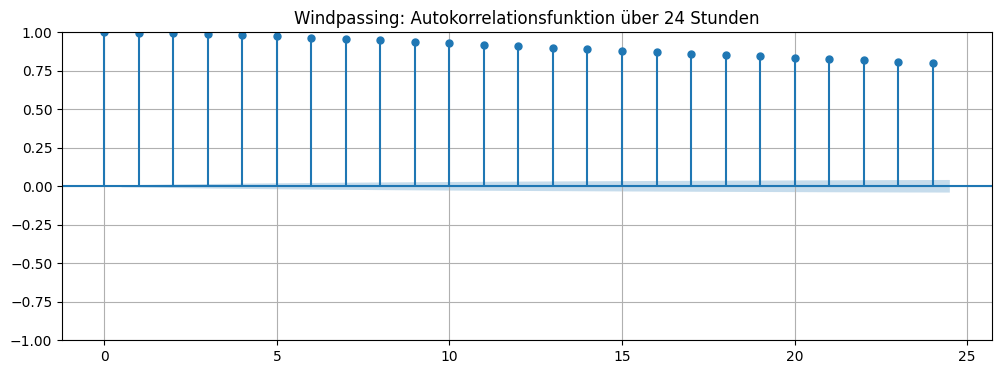

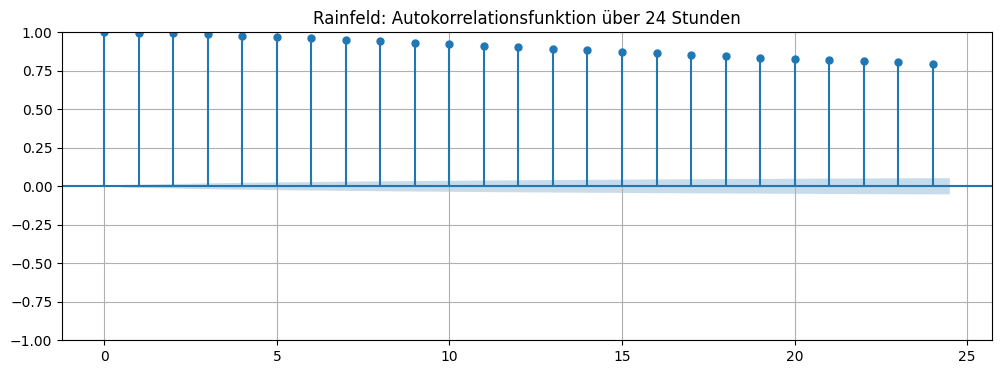

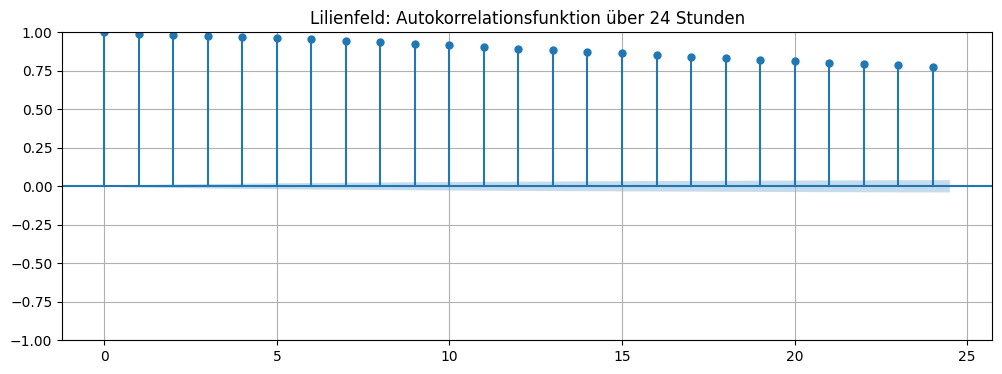

In [ ]:
for i in range(len(dfs)):
  df = dfs[stations[i]]
  plot_acf(df.p, lags=24, title=stations[i] + ': Autokorrelationsfunktion über 24 Stunden',);

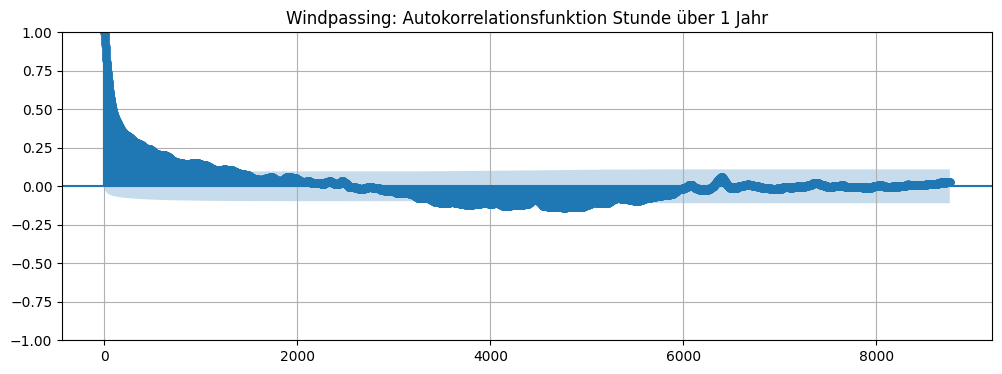

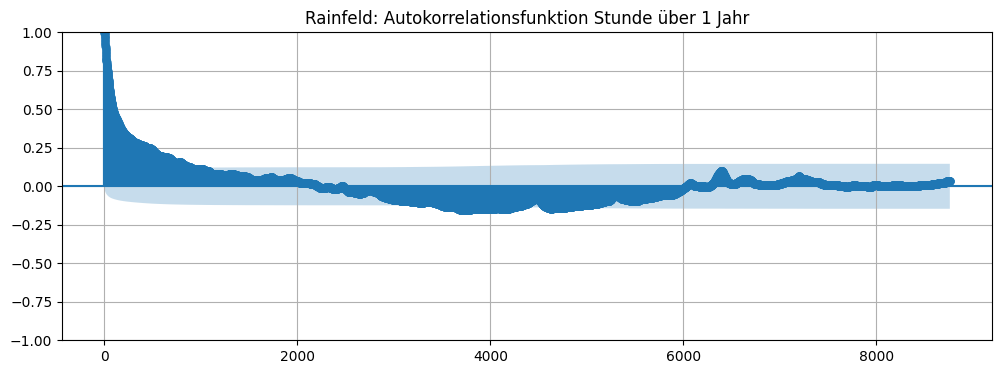

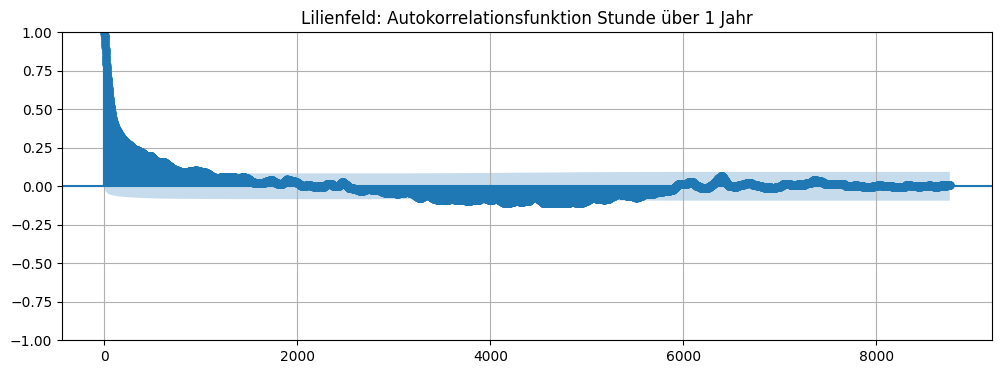

In [ ]:
for i in range(len(dfs)):
  df = dfs[stations[i]]
  plot_acf(df.p, lags=365*24, title= stations[i] + ': Autokorrelationsfunktion Stunde über 1 Jahr',);

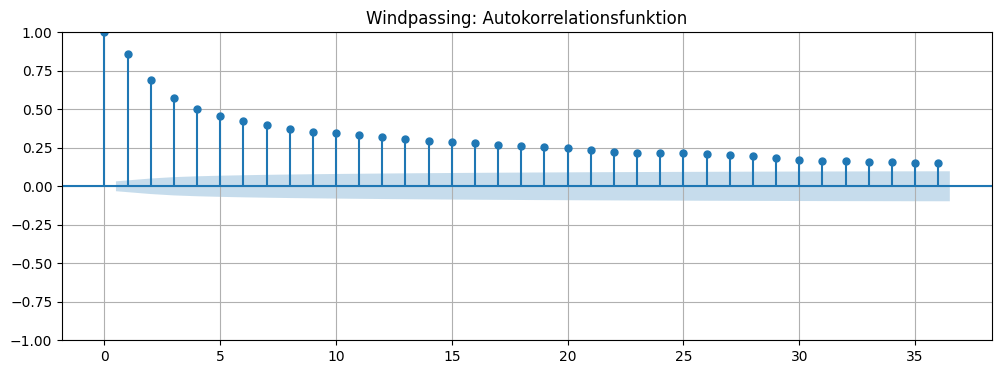

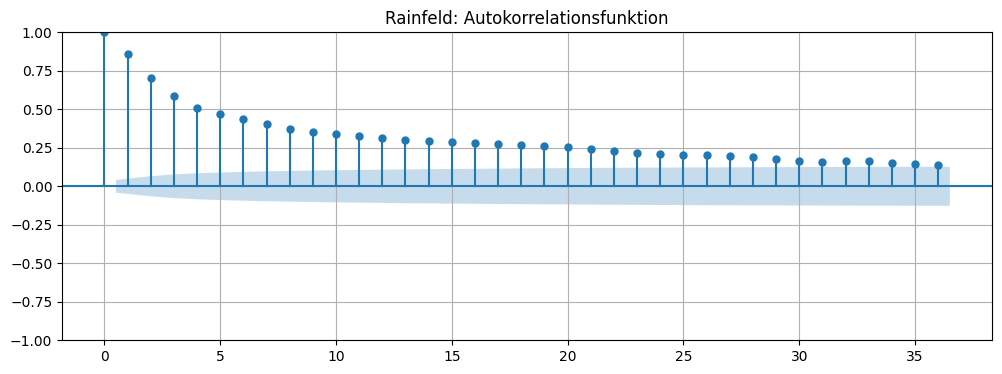

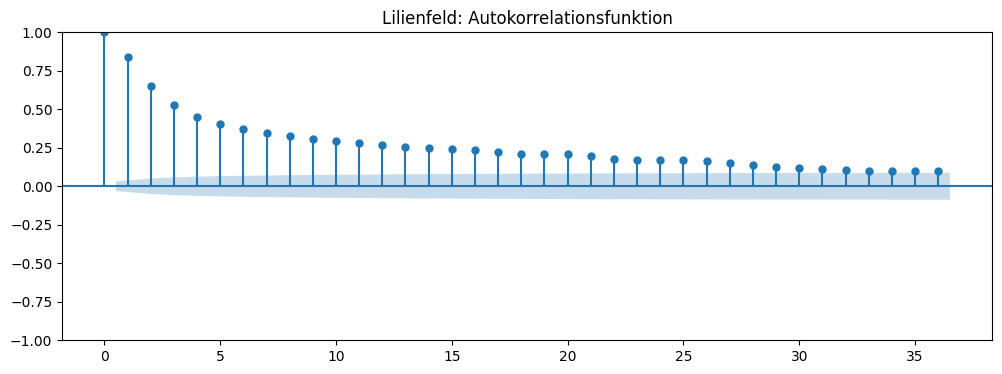

In [ ]:
for i in range(len(dfs_day)):
  df = dfs_day[stations[i]]
  plot_acf(df.p, lags=36, title= stations[i] + ': Autokorrelationsfunktion Tag über 36 Tage',)
plt.grid();

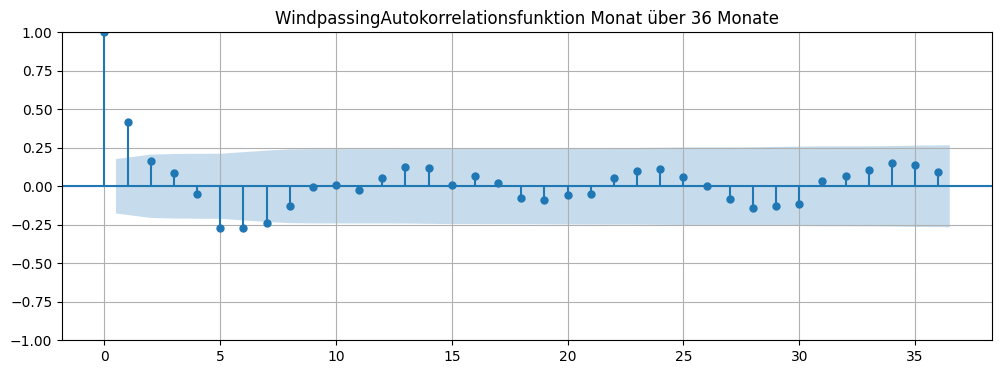

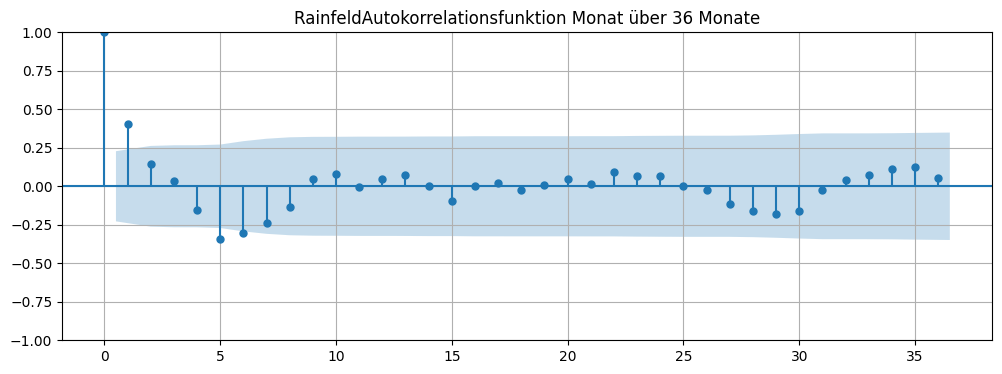

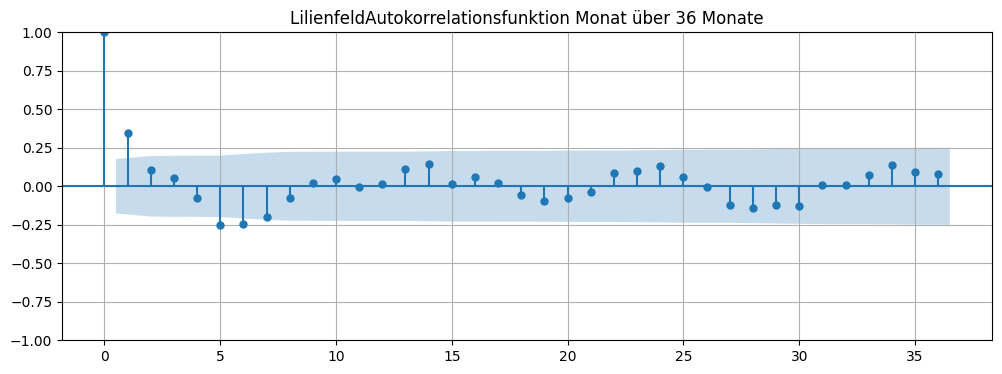

In [ ]:
for i in range(len(dfs_month)):
  df = dfs_month[stations[i]]
  plot_acf(df.p, lags=36, title= stations[i] + 'Autokorrelationsfunktion Monat über 36 Monate');

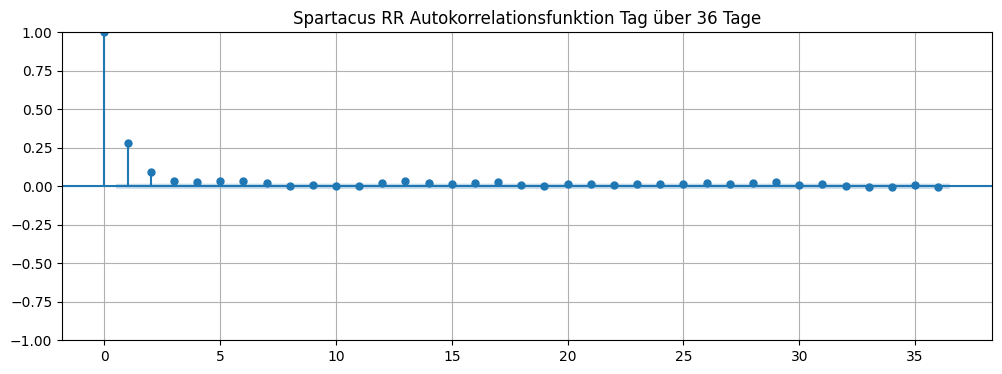

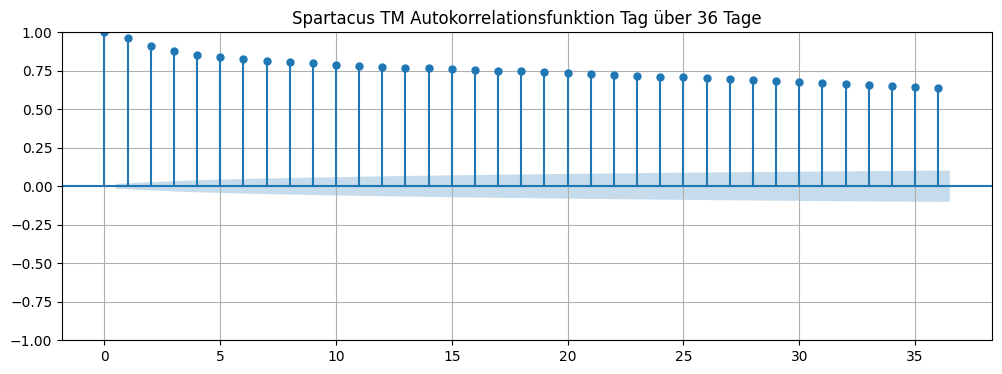

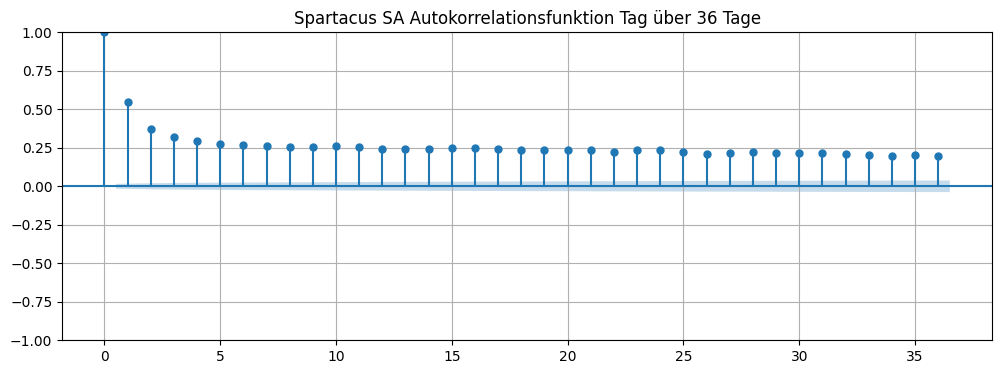

In [ ]:
cols = ['RR','TM','SA']
for col in cols:
  plot_acf(spartacus[col], lags=36, title= 'Spartacus ' + col + ' Autokorrelationsfunktion Tag über 36 Tage')

## **<font size="+2">4.3 Zeitreihendekomposition</font>**

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose # für Zeitreihendekomposition

Windpassing
Rainfeld
Lilienfeld


<Figure size 1800x400 with 0 Axes>

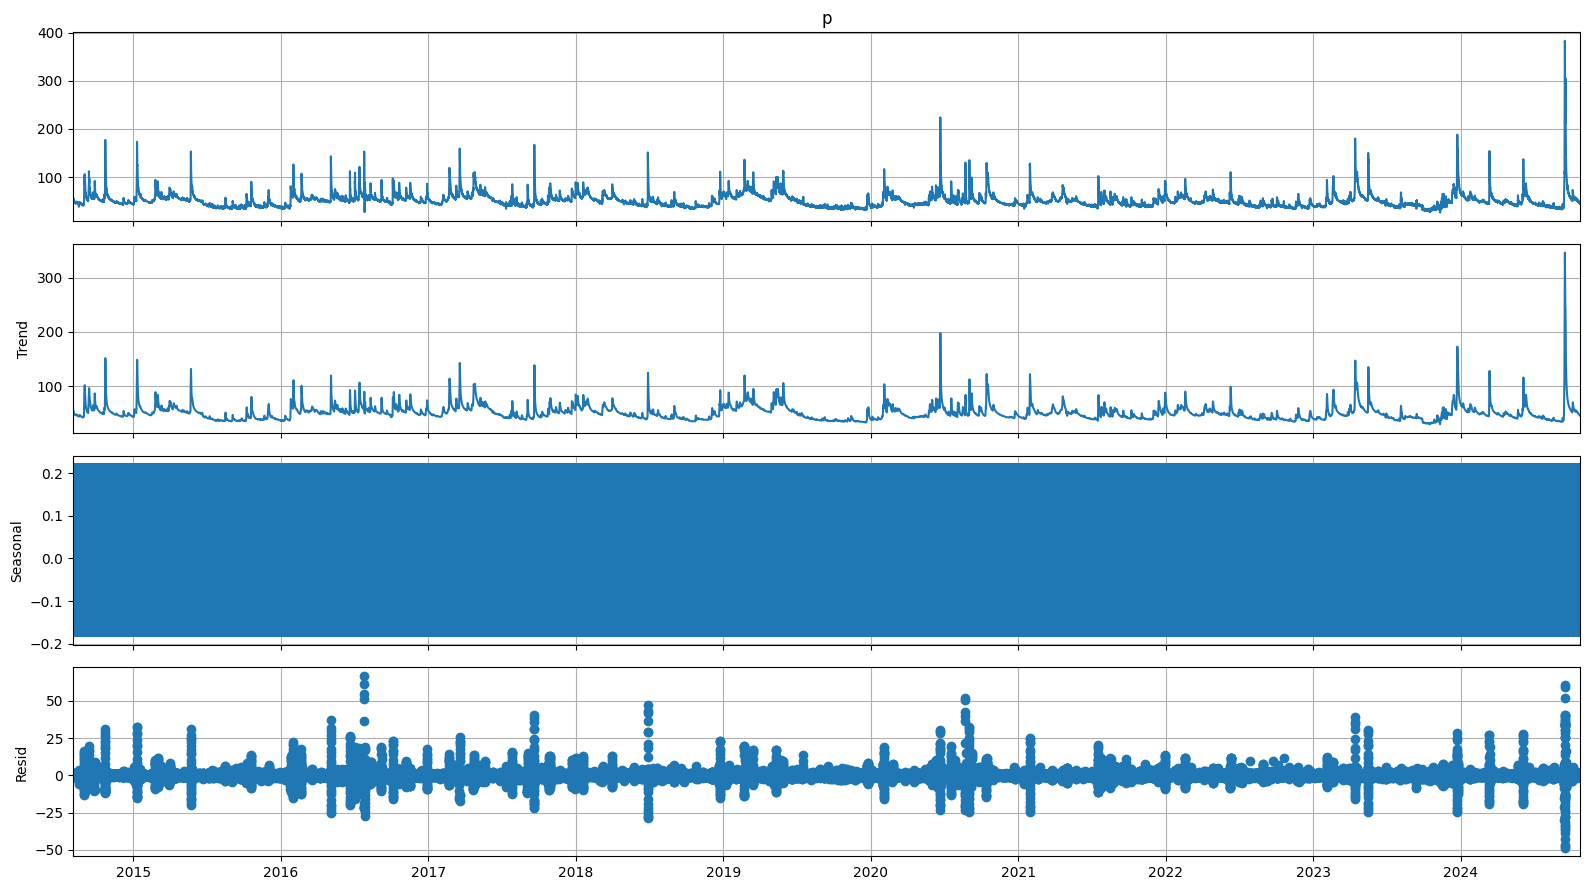

<Figure size 1800x400 with 0 Axes>

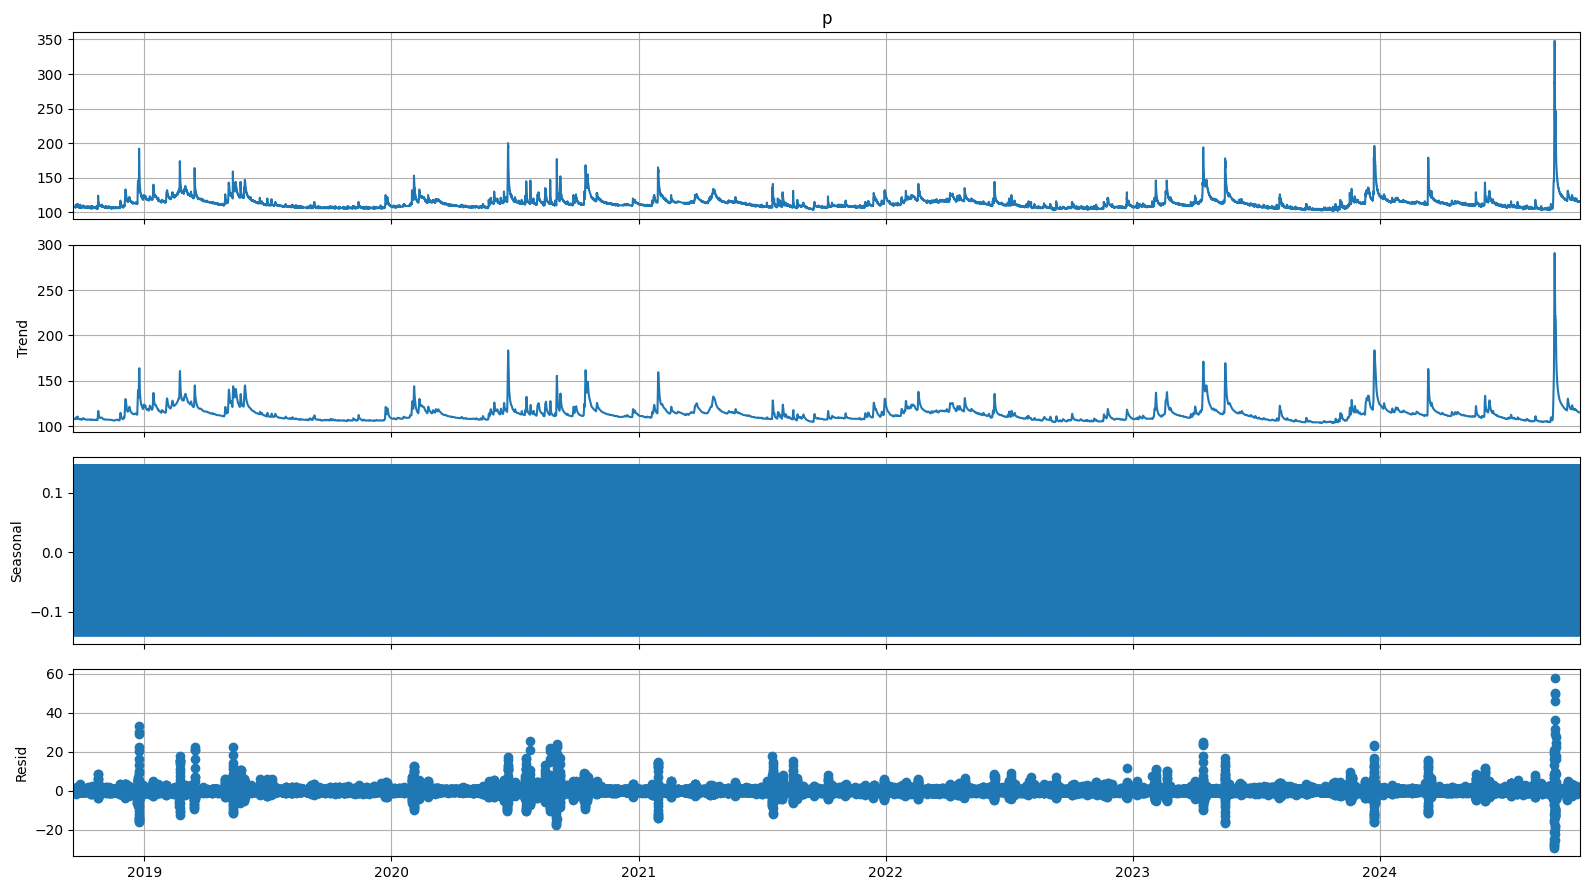

<Figure size 1800x400 with 0 Axes>

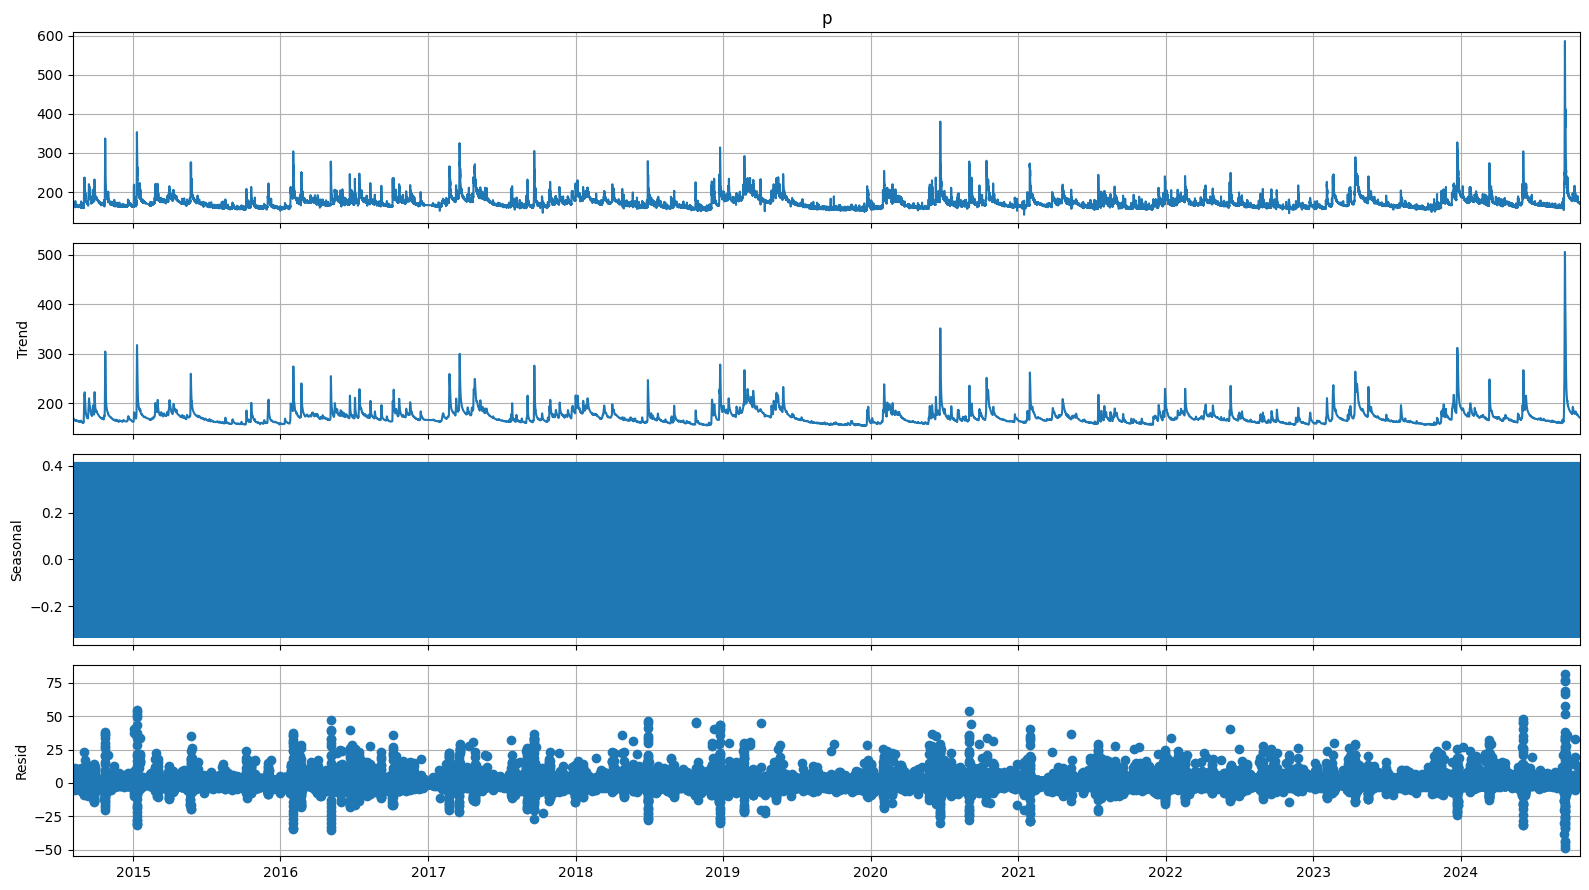

In [ ]:
for i in range(len(dfs)):
  df = dfs[stations[i]]
  print(stations[i])
  decomposed = seasonal_decompose(df.p, model = 'additive')
  fig = decomposed.plot()
  fig.set_size_inches((16, 9))
  # Tight layout to realign things
  fig.tight_layout();

Windpassing
Rainfeld
Lilienfeld


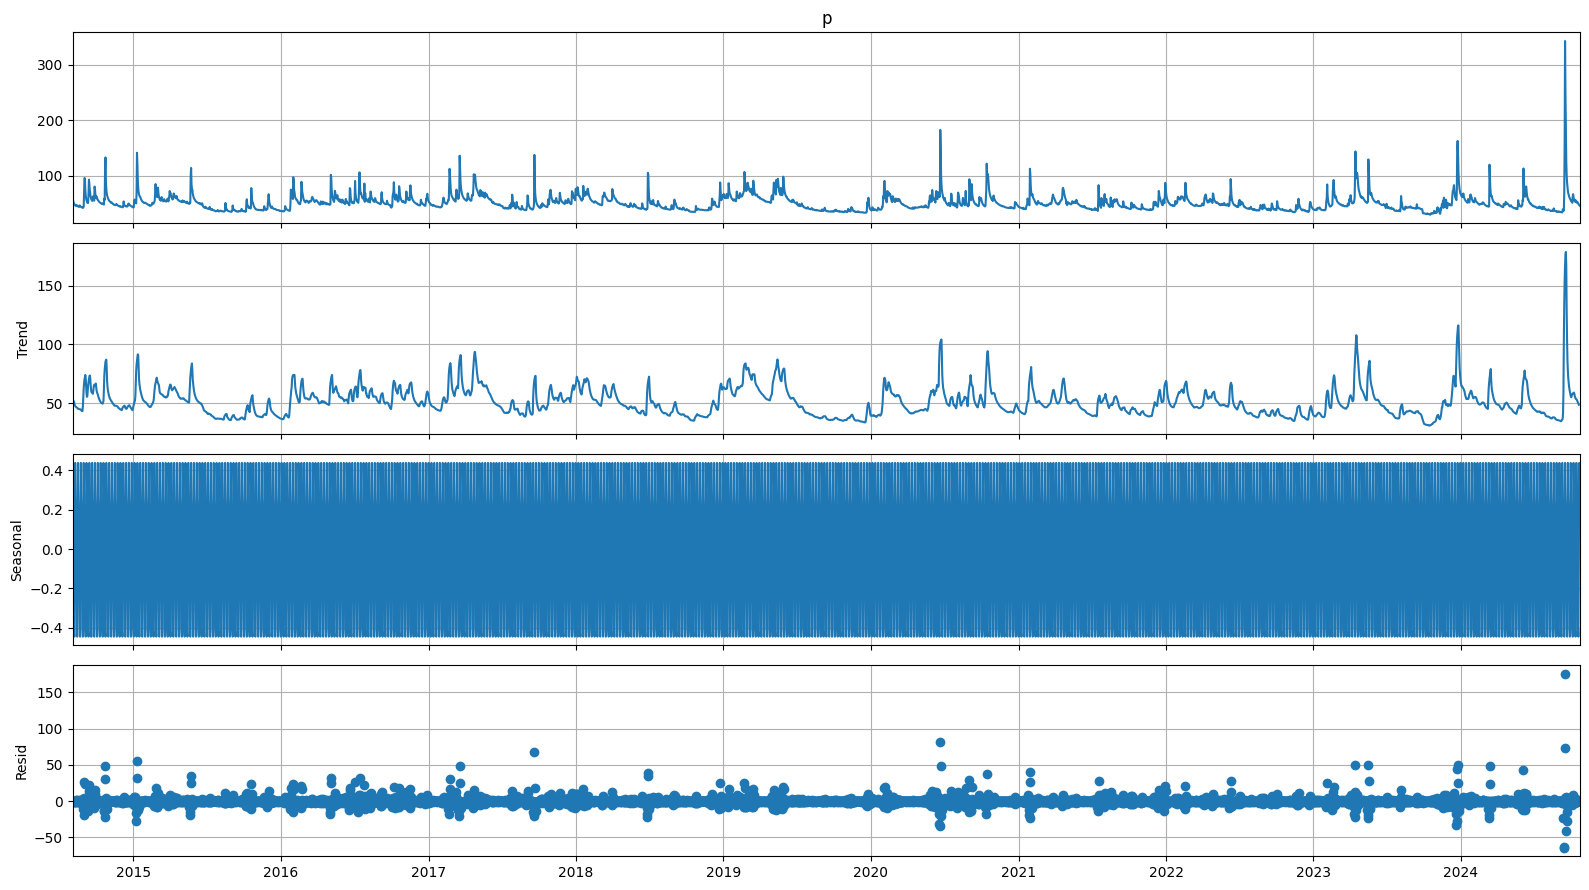

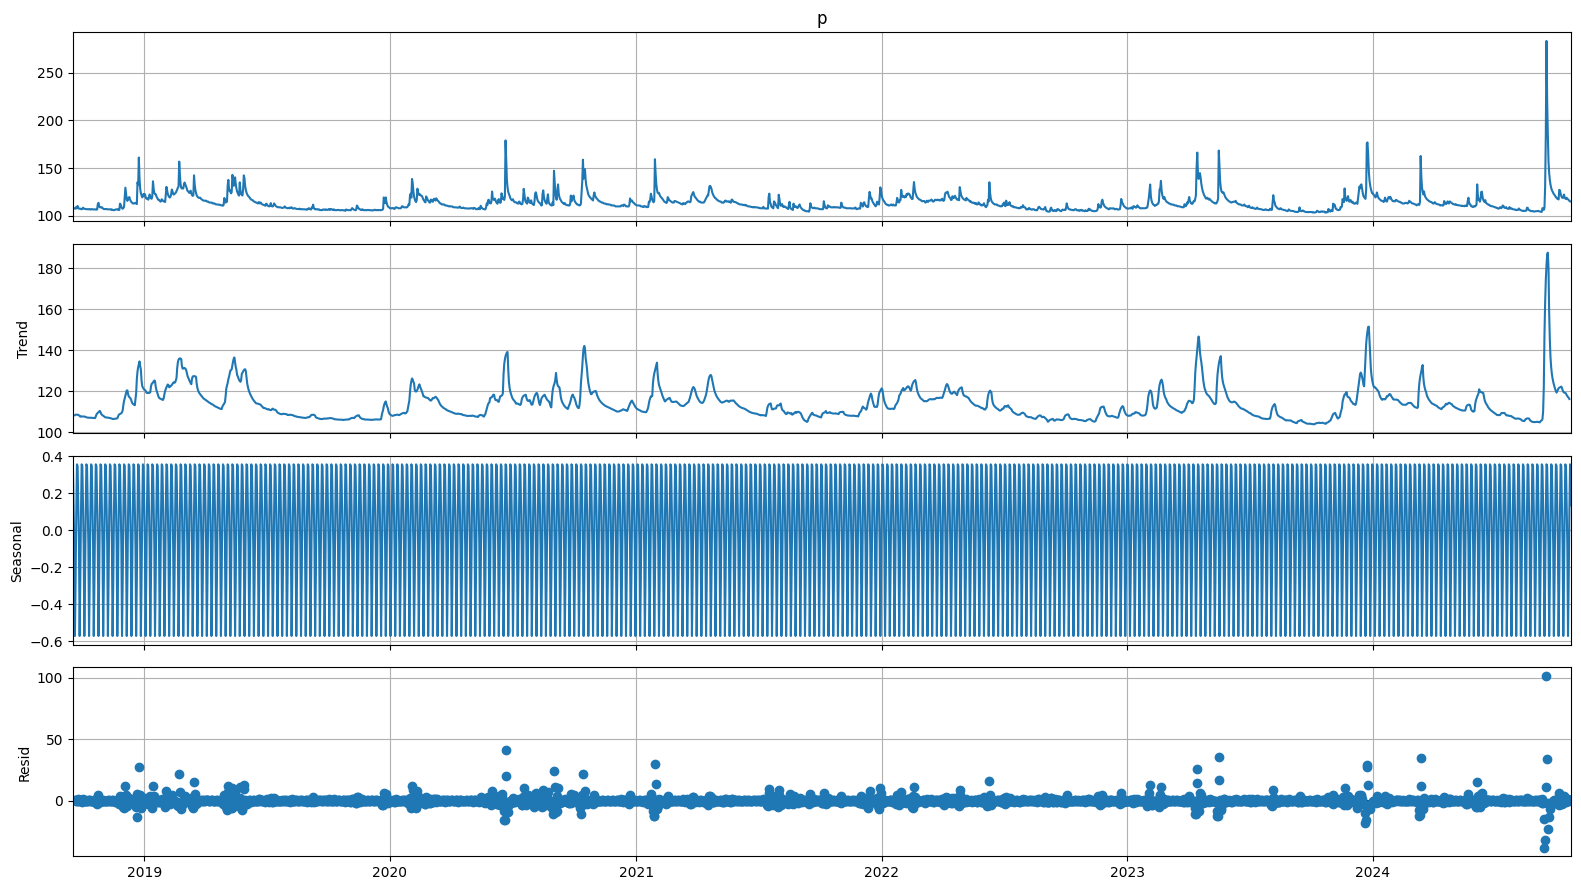

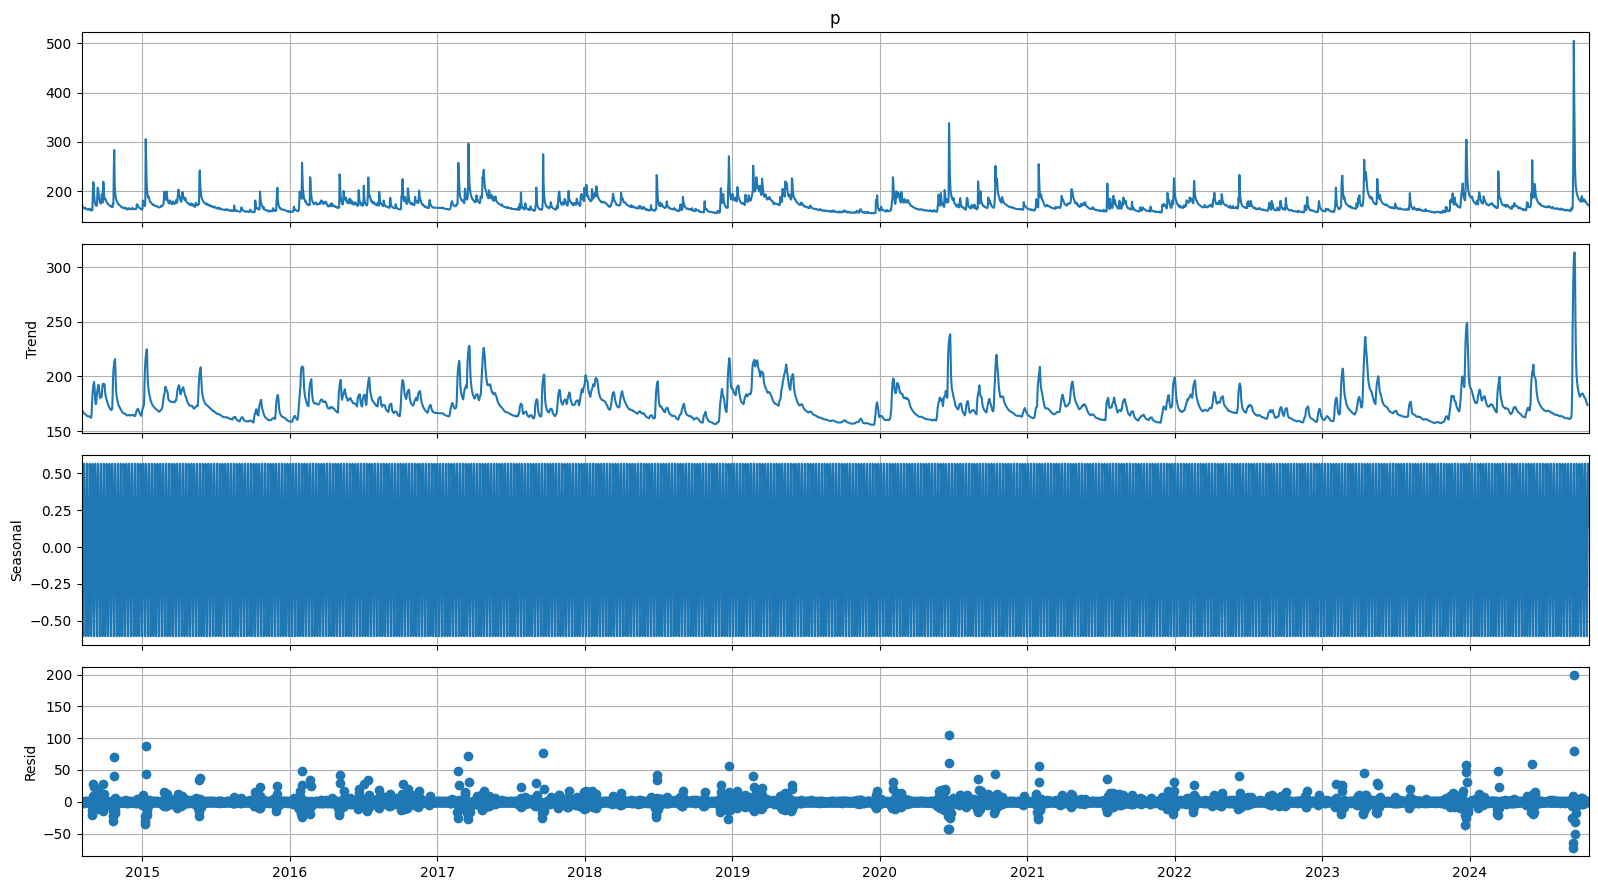

In [ ]:
for i in range(len(dfs_day)):
  df = dfs_day[stations[i]]
  print(stations[i])
  decomposed = seasonal_decompose(df.p, model = 'additive')
  fig = decomposed.plot()
  fig.set_size_inches((16, 9))
  fig.tight_layout();

Windpassing
Rainfeld
Lilienfeld


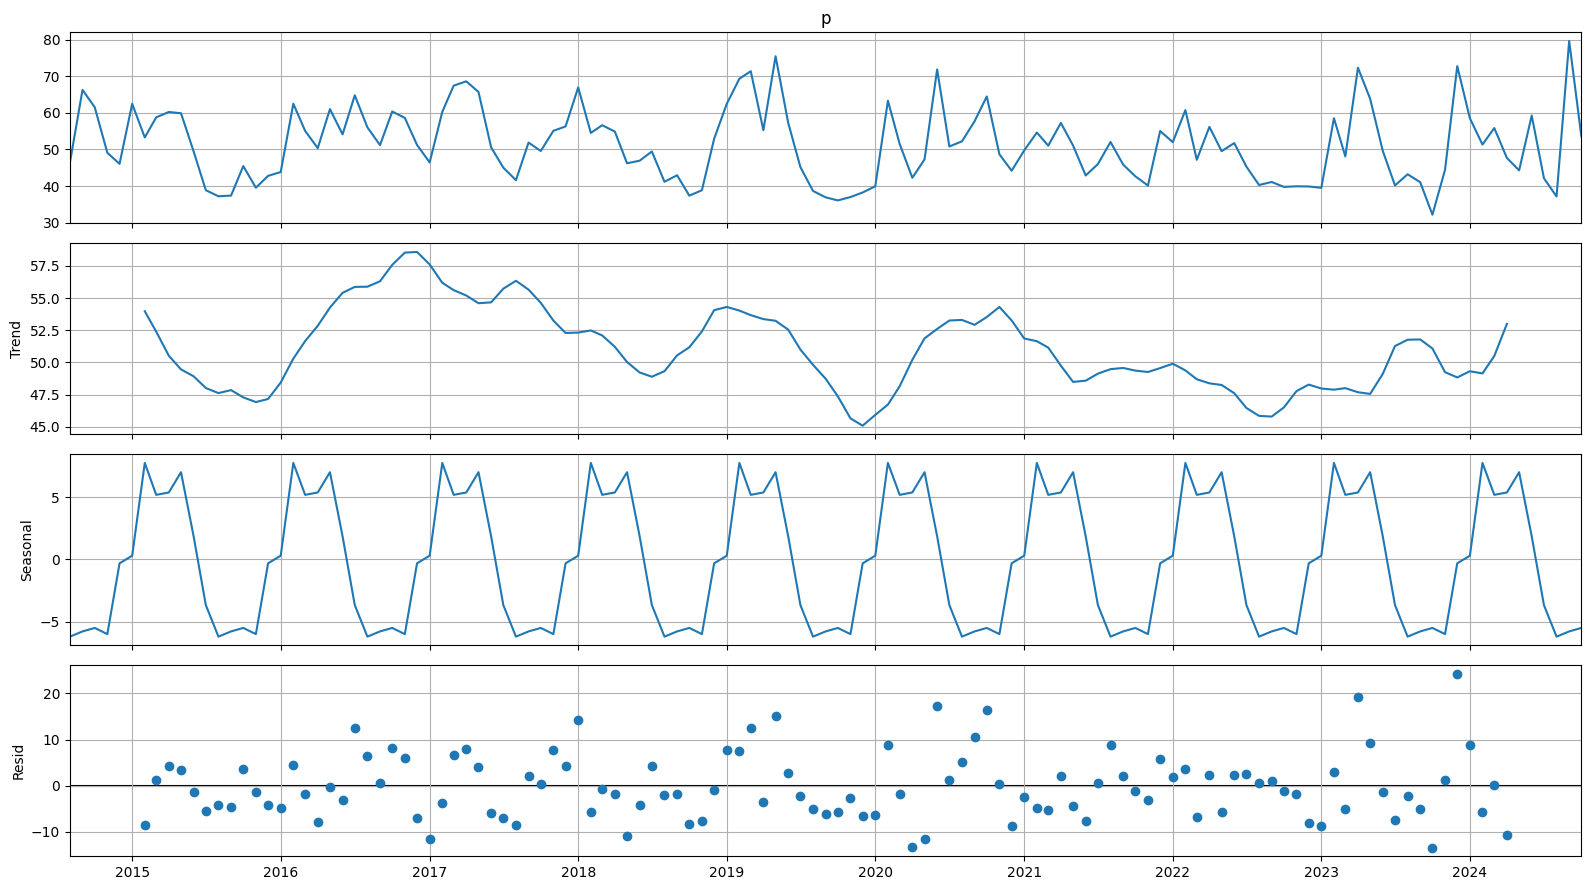

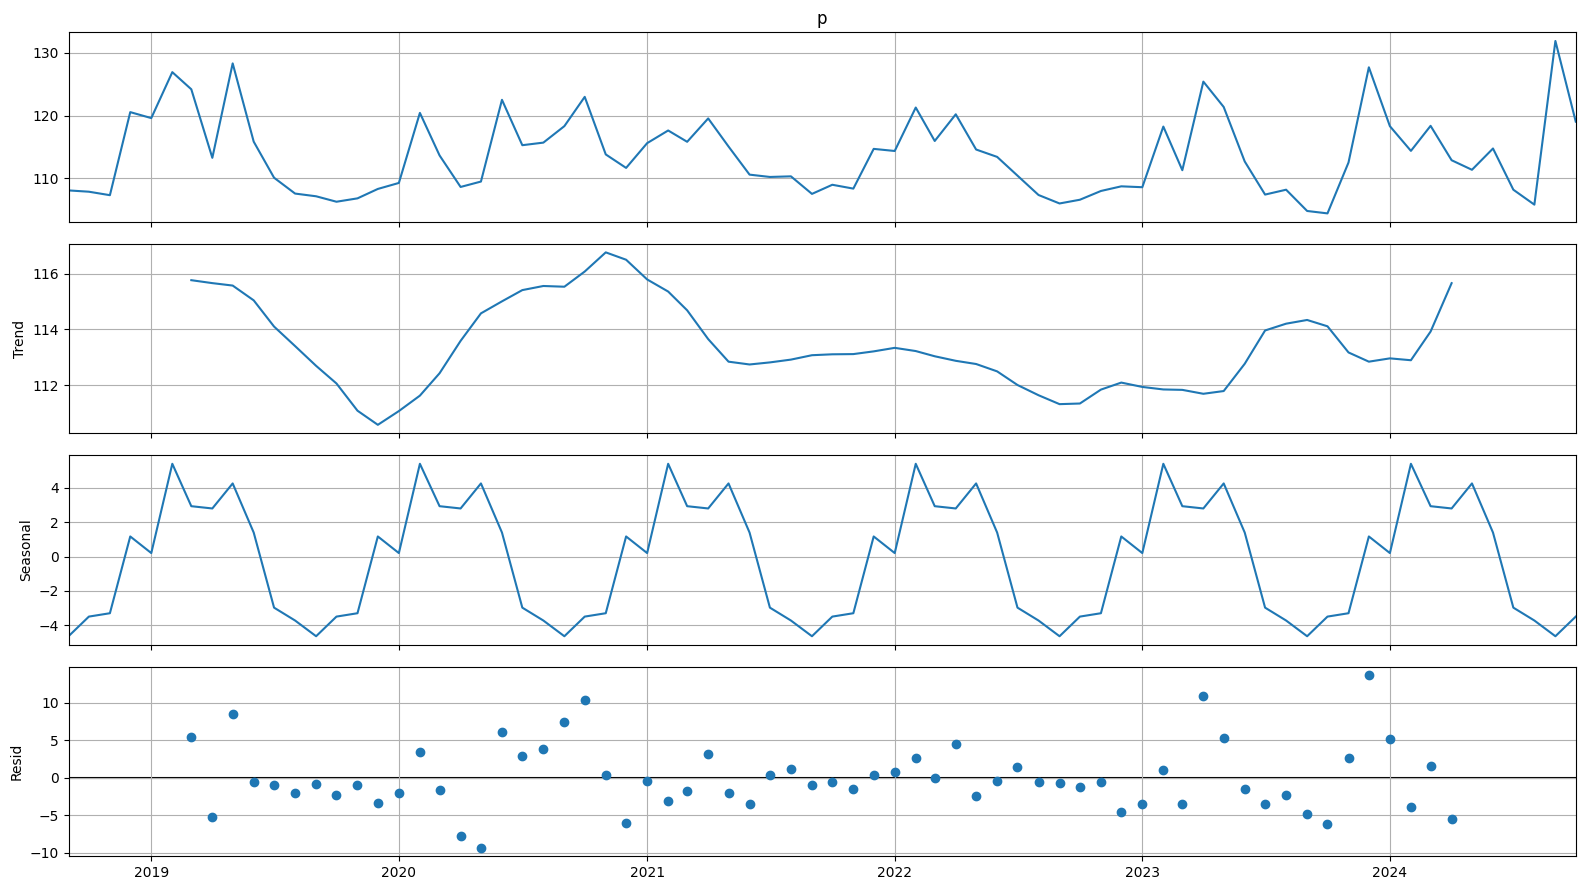

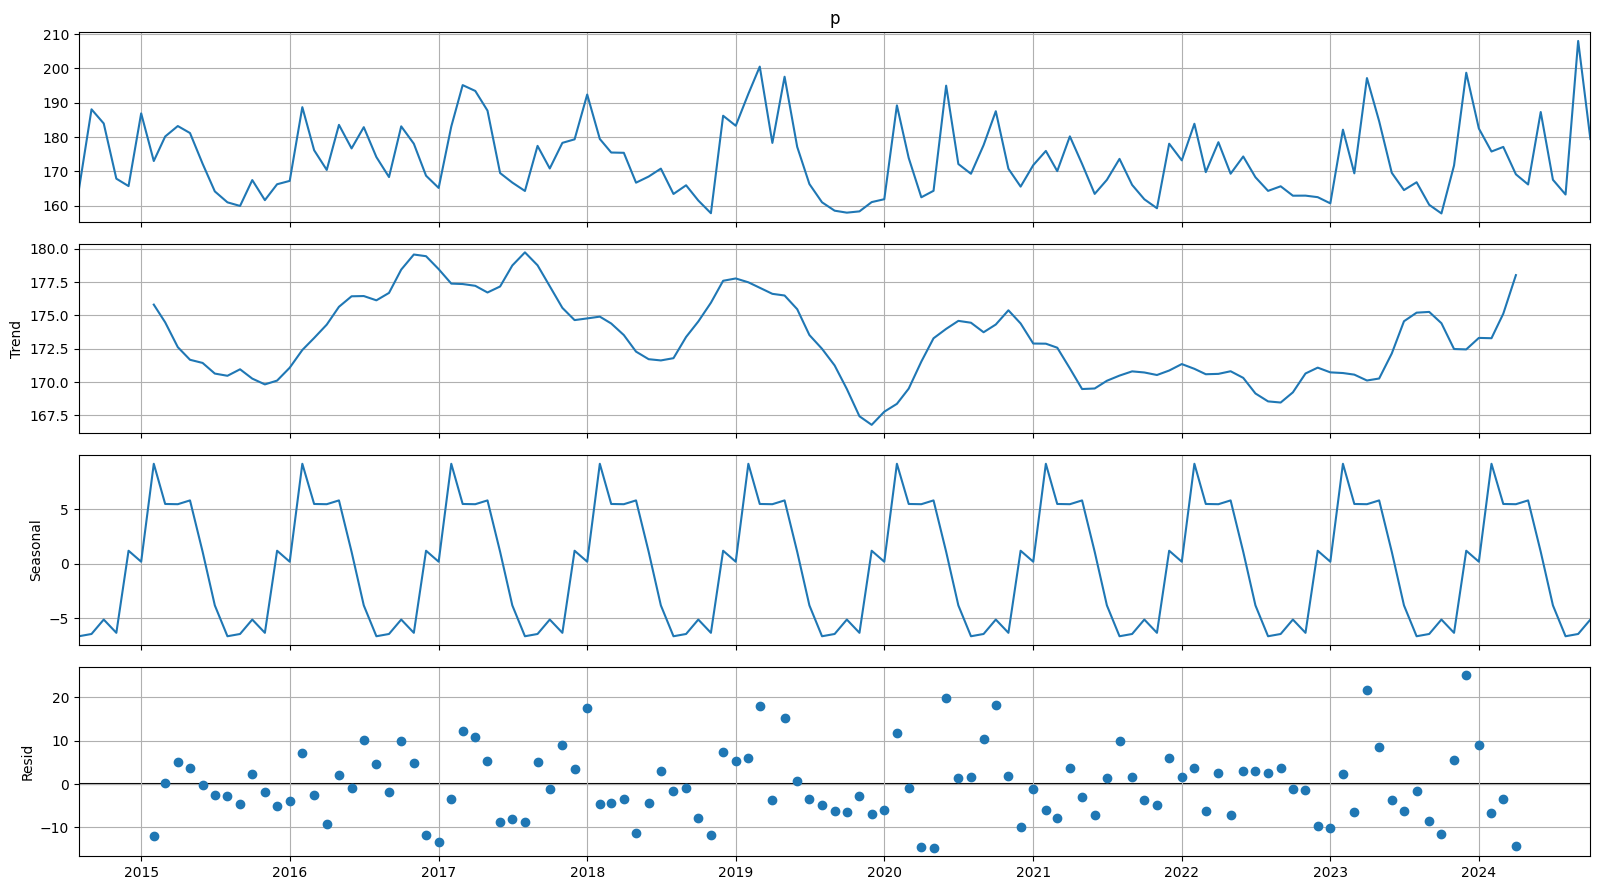

In [ ]:
for i in range(len(dfs_month)):
  df = dfs_month[stations[i]]
  print(stations[i])
  decomposed = seasonal_decompose(df.p, model = 'additive')
  fig = decomposed.plot()
  fig.set_size_inches((16, 9))
  fig.tight_layout();

# **<font size="+3">5 Forecasting</font>**

## **<font size="+2">5.1 Problemstellung</font>**

<ul>
<li>Vorhersage des stündlichen Pegelstands Wimpassing
<li>Prognosehorizont: 24 Stunden
<li>Prognoseintervall: 6 Stunden
</ul>

## **<font size="+2">5.2 Einstellungen</font>**

<ul>
<li>Mit den letzten 3 Monaten (2.160 Stunden) soll ein Modell trainiert werden, dass die nächsten 24h vorhersagt
<li>Berechnung der Prognosequalität mit 100 folgenden Prognosen mit Horizont 24h
<li>Minimierung des Prognosefehlermaßes RMSE (Root Mean Squared Error)
<li>Es gibt insgesamt 100*24 = 2400 Prognosefehler, aus denen ein RMSE errechnet wird
</ul>

In [ ]:
train_start  = datetime(2021,12,29)
train_len_nr = 3*30*24       # Trainingszeitraum für Modelle: 3 Monate = 2.160 Datensätze
trials       = 100           # zum Testen sollen 100 Mal Prognosen für 24h berechnet werden
interval_nr  = 6             # Alle 6 Stunden sollen Prognosen errechnet werden
horizon_nr   = 24            # Prognosen sollen für 24h erzeugt werden
colors       = ['blue','red']

In [ ]:
interval    = timedelta(hours = interval_nr)
horizon     = timedelta(hours = horizon_nr)
train_len   = timedelta(hours = (train_len_nr-1))
train_end   = train_start + train_len
test_start  = train_end + timedelta(hours = 1)
test_end    = train_end + horizon

In [ ]:
print(train_end)
print(test_end)

2022-03-28 23:00:00
2022-03-29 23:00:00


In [ ]:
print(test_end + (trials-1)*interval+horizon)

2022-04-24 17:00:00


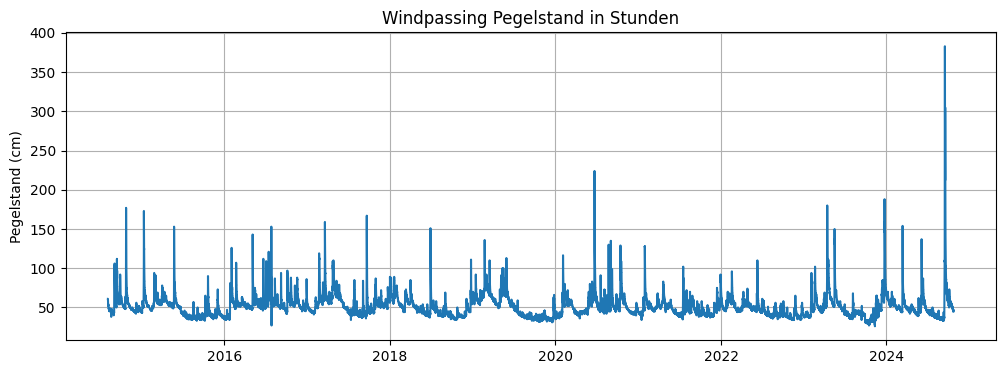

In [ ]:
df = dfs['Windpassing']
plt.plot(df.index, df.p)
plt.ylabel('Pegelstand (cm)')
plt.title('Windpassing Pegelstand in Stunden');

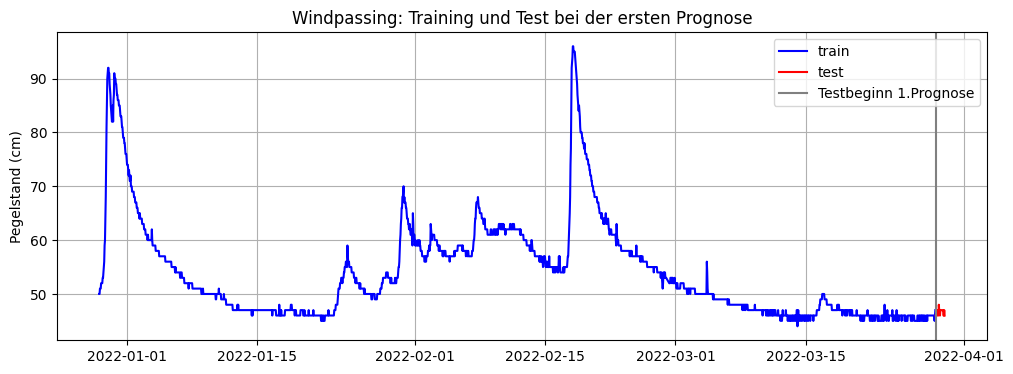

In [ ]:
train = df[ (df.index >= train_start) & (df.index <= train_end)]     # vom Anfang ohne die letzten 24 Monate"
test  = df[ (df.index >= test_start)  & (df.index <= test_end) ]

plt.plot(train.index, train.p, color ='blue', label = 'train')
plt.plot(test.index,  test.p,  color ='red',  label = 'test')
plt.axvline(x = test_start, color = 'grey', label = 'Testbeginn 1.Prognose')
plt.ylabel('Pegelstand (cm)')
plt.title('Windpassing: Training und Test bei der ersten Prognose')
plt.legend();

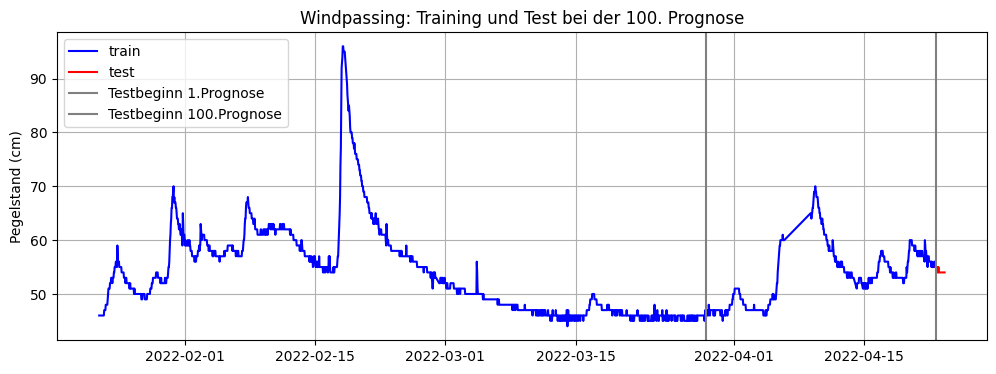

In [ ]:
testduration = (trials-1)*interval
train = df[ (df.index >= train_start + testduration) & (df.index <= train_end + testduration)]
test  = df[ (df.index >= test_start  + testduration) & (df.index <= test_end  + testduration) ]

plt.plot(train.index, train.p, color ='blue', label = 'train')
plt.plot(test.index, test.p,  color ='red', label = 'test')
plt.ylabel('Pegelstand (cm)')
plt.axvline(x = test_start, color = 'grey', label = 'Testbeginn 1.Prognose')
plt.axvline(x = test_start + testduration, color = 'grey', label = 'Testbeginn 100.Prognose')

plt.title('Windpassing: Training und Test bei der ' + str(trials) + '. Prognose')
plt.legend();

## **<font size="+2">5.3 Forecasting - univariat</font>**

### **<font size="+2">5.31 Naive Prognose</font>**

Der letzte bekannte Wert wird als Prognose verwendet.

In [ ]:
predictions_list = []     # Sammlung der Forecasts
errors_list      = []     # Sammlung Prognosefehler

for i in range(trials):
  lastvalue   = df[ df.index == train_end + i*interval ].p.item()     # Letzter Werte des Trainingsbereichs
  test_interval = pd.date_range(start= test_start + i*interval, periods=horizon_nr, freq='h')
  predictions = pd.DataFrame(pd.Series(horizon_nr*[lastvalue], index=[x for x in test_interval ]))
  predictions_list.append(predictions)
  temp = pd.merge(df, predictions, left_index=True, right_index=True)
  errors = ((temp.p - temp.iloc[:,1])**2).to_list()
  errors_list.append(errors)

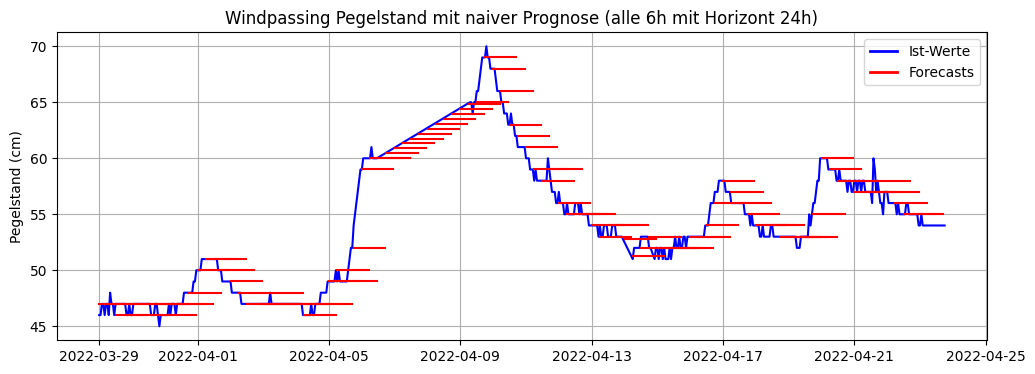

In [ ]:
plt.title('Pegelstand pro Stunde und naive Prognose mit Horizont 24h', size=15)
plt.plot(df[ (df.index >= test_start) & (df.index <= test_start + (trials-1)*interval + horizon)].p, color = colors[0])
for i in range(trials):
  plt.plot(predictions_list[i],     color = 'red')
plt.ylabel('Pegelstand')

lines = [Line2D([0], [0], color=c, linewidth=2, linestyle='-') for c in colors]
labels = ['Ist-Werte', 'Forecasts']
plt.legend(lines, labels)

plt.ylabel('Pegelstand (cm)')
plt.title('Windpassing Pegelstand mit naiver Prognose (alle 6h mit Horizont 24h)');

In [ ]:
preds = [x for xs in errors_list for x in xs]
print(f'RMSE naive Prognose = {round(np.sqrt(sum(preds) / len (preds)).item(),2) }')

RMSE naive Prognose = 2.33


### **<font size="+2">5.32 Exponential Smoothing</font>**

https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [ ]:
alphas = [0.1,0.3,0.4,0.5,1.0]
betas  = [0.00,0.01,0.02,0.03]

for alpha in alphas:
  for beta in betas:
    predictions_list = []
    errors_list      = []
    for i in range(trials):
      train       = df[ (df.index >= train_start + i*interval) & (df.index < train_end + i*interval) ]
      model       = ExponentialSmoothing(train.p, trend='add')
      results     = model.fit(smoothing_level=alpha, smoothing_trend=beta)
      predictions = pd.DataFrame(results.forecast(steps=horizon_nr))
      fitted      = results.fittedvalues
      predictions_list.append(predictions)
      temp = pd.merge(df, predictions, left_index=True, right_index=True)
      errors = ((temp.p - temp.iloc[:,1])**2).to_list()
      errors_list.append(errors)
    errors_flat = [x for xs in errors_list for x in xs]
    print(f'alpha = {alpha:.2f}, beta = {beta:.2f}, RMSE = {np.sqrt(sum(errors_flat) / len (errors_flat)).item():.2f}')

alpha = 0.10, beta = 0.00, RMSE = 2.99
alpha = 0.10, beta = 0.01, RMSE = 3.10
alpha = 0.10, beta = 0.02, RMSE = 3.12
alpha = 0.10, beta = 0.03, RMSE = 3.13
alpha = 0.30, beta = 0.00, RMSE = 2.54
alpha = 0.30, beta = 0.01, RMSE = 2.61
alpha = 0.30, beta = 0.02, RMSE = 2.64
alpha = 0.30, beta = 0.03, RMSE = 2.67
alpha = 0.40, beta = 0.00, RMSE = 2.47
alpha = 0.40, beta = 0.01, RMSE = 2.54
alpha = 0.40, beta = 0.02, RMSE = 2.57
alpha = 0.40, beta = 0.03, RMSE = 2.60
alpha = 0.50, beta = 0.00, RMSE = 2.43
alpha = 0.50, beta = 0.01, RMSE = 2.50
alpha = 0.50, beta = 0.02, RMSE = 2.53
alpha = 0.50, beta = 0.03, RMSE = 2.56
alpha = 1.00, beta = 0.00, RMSE = 2.35
alpha = 1.00, beta = 0.01, RMSE = 2.42
alpha = 1.00, beta = 0.02, RMSE = 2.45
alpha = 1.00, beta = 0.03, RMSE = 2.48


In [ ]:
alpha = 0.4
beta  = 0.05

predictions_list = []
errors_list      = []

for i in range(trials):
  train       = df[ (df.index >= train_start + i*interval) & (df.index < train_end + i*interval) ]
  model       = ExponentialSmoothing(train.p, trend='add')
  results     = model.fit(smoothing_level=alpha, smoothing_trend=beta)
  predictions = pd.DataFrame(results.forecast(steps=horizon_nr))
  predictions_list.append(predictions)
  temp = pd.merge(df, predictions, left_index=True, right_index=True)
  errors = ((temp.p - temp.iloc[:,1])**2).to_list()
  errors_list.append(errors)
  preds = [x for xs in errors_list for x in xs]
rmse = (np.sqrt(sum(preds) / len (preds)).item())
print(f'alpha = {alpha:.2f}, beta = {beta:.2f}, RMSE = {rmse:.2f}')

alpha = 0.40, beta = 0.05, RMSE = 2.67


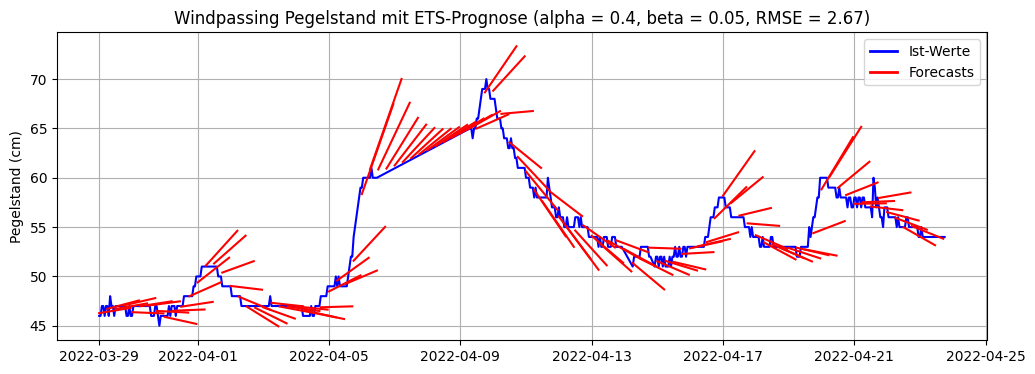

In [ ]:
plt.title('Windpassing Pegelstand mit ETS-Prognose (alpha = '+str(alpha)+', beta = '+str(beta)+', RMSE = ' + str(round(rmse,2))+ ')' )
plt.plot(df[ (df.index >= train_start + train_len) & (df.index <= train_start + train_len + interval*(trials-1) + horizon)].p, color = colors[0] )
for i in range(trials):
  plt.plot(predictions_list[i], color = colors[1])
plt.ylabel('Pegelstand')

lines = [Line2D([0], [0], color=c, linewidth=2, linestyle='-') for c in colors]
labels = ['Ist-Werte', 'Forecasts']
plt.legend(lines, labels)
plt.ylabel('Pegelstand (cm)');

### **<font size="+2">5.24 ARIMA</font>**

<ul>
<li><b>ARIMA = Auto Regressive Integrated Moving Average</b>
<li>Gehört zu den (univariaten) Modellen, die aus vergangenen Daten der eigenen Zeitreihe Prognosen erzeugen
<li><b>ARIMA arbeitet mit der Autokorrelation der Daten</b>
<li><b>Ein ARIMA-Modell wird über drei Parameter $(p,d,q)$ spezifiziert.</b>
</ul>

https://otexts.com/fpp3/arima.html<br>
https://towardsdatascience.com/time-series-from-scratch-autoregression-theory-and-implementation-f8c614f738f2

Mit pmdarima gibt es eine Python-library, die fehlende Funktionalitäten von  Python hinsichtlich Zeitreihen ergänzt.<br>
https://pypi.org/project/pmdarima/<br>
Da sich pmdarima aufgrund Versionsproblemen mit numpy aktuelle auf Google Colab nicht installieren lässt, wird pmdarmina hier nicht verwendet.

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
ps = [0,1,2,3]
ds = [0,1]
qs = [0,1,2,3]

warnings.filterwarnings('ignore')

for p in ps:
  for d in ds:
    for q in qs:
      predictions_list = []
      errors_list = []
      bic_list = []
      for i in range(trials):
        train       = df[ (df.index >= train_start + i*interval) & (df.index < train_end + i*interval) ]
        model       = ARIMA(train, order=(p, d, q)).fit()
        predictions = model.forecast(horizon_nr)
        predictions_list.append(predictions)
        #if i % 10 == 0: print(i)
        temp = pd.merge(df, predictions, left_index=True, right_index=True)
        errors = ((temp.p - temp.iloc[:,1])**2).to_list()
        errors_list.append(errors)
        bic_list.append(model.bic)
      preds = [x for xs in errors_list for x in xs]
      rmse = np.sqrt(sum(preds) / len (preds)).item()
      bic_mean = (sum(bic_list) / len(bic_list)).item()
      print(f'p = {p}, d = {d}, q = {q}, RMSE = {rmse:.2f}, BIC = {bic_mean:.0f}')

p = 0, d = 0, q = 0, RMSE = 6.09, BIC = 15115
p = 0, d = 0, q = 1, RMSE = 5.99, BIC = 12393


KeyboardInterrupt: 

In [ ]:
ps = [0,1,2,3]
ds = [0,1]
qs = [0,1,2,3]
Ps = [0]
Ds = [0]
Qs = [0]
order = 0

#sm_model = SARIMAX(train, order = (p, d, q),
#                seasonal_order =(P, D, Q, order),
#                trend = 'c',
#enforce_stationarity = False,
#enforce_invertibility = False)

#import warnings
#warnings.filterwarnings('ignore')

for p in ps:
  for d in ds:
    for q in qs:
      for P in ps:
        for D in ds:
          for Q  in qs:
            predictions_list = []
            errors_list = []
            bic_list = []
            for i in range(trials):
              train       = df[ (df.index >= train_start + i*interval) & (df.index < train_end + i*interval) ]
              model       = SARIMAX(train, order = (p, d, q), seasonal_order =(P, D, Q, order),
                                    trend = 'c', enforce_stationarity = False, enforce_invertibility = False).fit()
              predictions = model.forecast(horizon_nr)
              predictions_list.append(predictions)
              temp = pd.merge(df, predictions, left_index=True, right_index=True)
              errors = ((temp.p - temp.iloc[:,1])**2).to_list()
              errors_list.append(errors)
              bic_list.append(model.bic)
            preds = [x for xs in errors_list for x in xs]
            rmse = np.sqrt(sum(preds) / len (preds)).item()
            bic_mean = (sum(bic_list) / len(bic_list)).item()
            print(f'ARIMA({p},{d},{q})({P},{D},{Q}), RMSE = {rmse:.2f}, BIC = {bic_mean:.0f}')

In [ ]:
ps = [10]
ds = [1]
qs = [0]

for p in ps:
  for d in ds:
    for q in qs:
      predictions_list = []
      errors_list = []
      bic_list = []
      for i in range(trials):
        train       = df[ (df.index >= train_start + i*interval) & (df.index < train_end + i*interval) ]
        model       = ARIMA(train, order=(p, d, q)).fit()
        predictions = model.forecast(horizon_nr)
        predictions_list.append(predictions)
        if i % 10 == 0: print(f'{i+1}. Prognose beendet.')
        temp = pd.merge(df, predictions, left_index=True, right_index=True)
        errors = ((temp.p - temp.iloc[:,1])**2).to_list()
        errors_list.append(errors)
        bic_list.append(model.bic)
      preds = [x for xs in errors_list for x in xs]
      rmse = np.sqrt(sum(preds) / len (preds)).item()
      bic_mean = (sum(bic_list) / len(bic_list)).item()
      print(f'p = {p}, d = {d}, q = {q}, RMSE = {rmse:.2f}, BIC = {bic_mean:.0f}')

0
10
20
30
40
50
60
70
80
90
p = 10, d = 1, q = 0, RMSE = 2.26, BIC = 4416


Text(0, 0.5, 'Pegelstand (cm)')

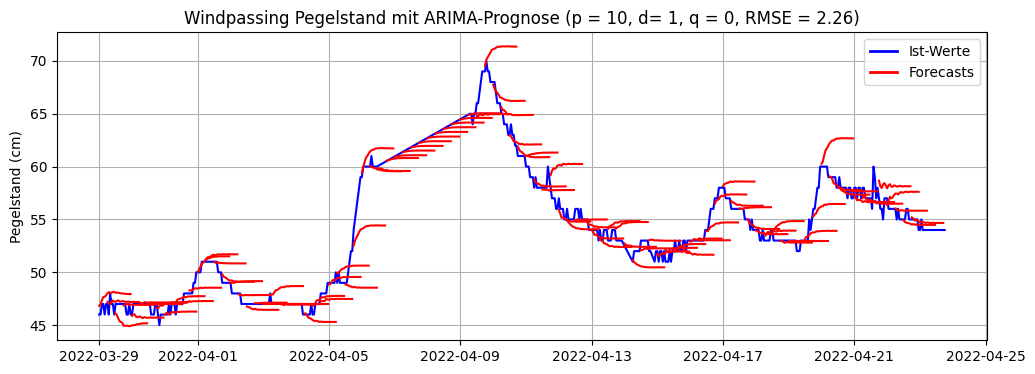

In [ ]:
plt.title('Windpassing Pegelstand mit ARIMA-Prognose (p = '+str(p)+', d= '+str(d)+', q = '+str(q)+', RMSE = ' + str(round(rmse,2))+ ')' )
plt.plot(df[ (df.index >= train_end) & (df.index <= train_end + interval*(trials-1) + horizon)].p, color = colors[0])
for i in range(trials):
  plt.plot(predictions_list[i], color = colors[1])

lines = [Line2D([0], [0], color=c, linewidth=2, linestyle='-') for c in colors]
labels = ['Ist-Werte', 'Forecasts']
plt.legend(lines, labels)
plt.ylabel('Pegelstand (cm)');

### **<font size="+2">5.25 XGBoost</font>**

https://xgboosting.com/xgboost-for-multi-step-univariate-time-series-forecasting-manually/

**Für jeden Prognosehorizont ein eigenes Modells**

In [ ]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree

In [ ]:
series  = df[ (df.index >= train_start ) & (df.index <= train_end) ].values
series = np.array([float(x) for xs in series for x in xs])  # flatten series

In [ ]:
# Gibt eine Matrix X und einen Vektor y zurück:
# Beispiel:
# series = [3,4,5,5,6,5,7] Folge von Beobachtungswerten
# lags = 3: Anzahl historischer Werte zur Berechnung Forecast
# horizon= 2
# OUTPUTs:
# X:  (3,4,5), (4,5,5), (5,5,6)
# y:   [ 6   ,    5   ,   7   ]

def sliding_window(series, lags, horizon):
   X, y = [], []
   for i in range(len(series) - lags - horizon + 1):
       X.append(series[i:(i + lags)])
       y.append(series[i + lags + horizon - 1])
   return np.array(X), np.array(y)

In [ ]:
lags_nrs = [1,5,10,20,40]

lags_times = []
for i in range(len(lags_nrs)):
  lags_times.append(timedelta(hours = lags_nrs[i]))

In [ ]:
rmse_best = 99
for k in range(len(lags_nrs)):
  X, y = [], []
  for step in range(horizon_nr):
    X1, y1 = sliding_window(series, lags_nrs[k], step)
    X.append(X1)
    y.append(y1)

  # Modelltraining für jeden Horizont
  models= []
  for step in range(horizon_nr):
    model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    model.fit(X[step], y[step])
    models.append(model)

  predictions_list = []
  errors_list      = []
  for i in range(trials):
    prediction = []
    errors = []
    times = []
    j = 0
    for model in models:
      x_start = train_end - lags_times[k] + i*interval
      x_end   =  train_end + i*interval
      x = df[ (df.index > x_start) & (df.index <= x_end ) ].values
      y_true = df [df.index == x_end + timedelta(hours = j)].values
      prediction_horizon = model.predict(x.reshape(1, -1)).item()
      prediction.append(prediction_horizon)
      error = (y_true - prediction_horizon)**2
      errors.append( error )
      times.append(x_end + timedelta(hours = j))
      j += 1
    prediction = pd.DataFrame(prediction, index = times)
    predictions_list.append(prediction)
    errors_list.append(np.concatenate(errors).ravel())
  errors_flat = [x for xs in errors_list for x in xs]
  rmse = np.sqrt(sum(errors_flat) / len (errors_flat)).item()
  print(f'Lags = {lags_nrs[k]}, RMSE = {rmse:.2f}')
  if rmse < rmse_best:
    rmse_best = rmse
    lags_best = lags_nrs[k]
    predictions_list_best = predictions_list

Lags = 1, RMSE = 2.41
Lags = 5, RMSE = 3.70
Lags = 10, RMSE = 3.55
Lags = 20, RMSE = 3.02
Lags = 40, RMSE = 3.65


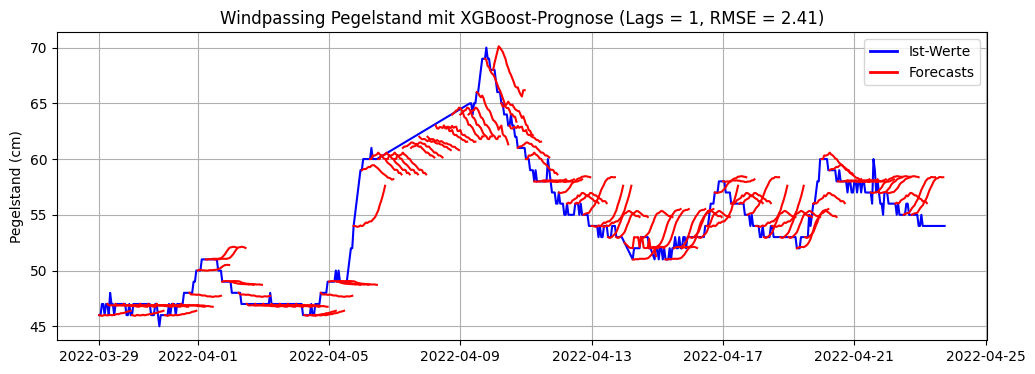

In [ ]:
plt.title('Windpassing Pegelstand mit XGBoost-Prognose (Lags = '+str(lags_best)+', RMSE = ' + str(round(rmse_best,2))+ ')' );
plt.plot(df[ (df.index >= train_start + train_len) & (df.index <= train_start + train_len + interval*(trials-1) + horizon)].p, color = colors[0] )
for i in range(trials):
  plt.plot(predictions_list_best[i], color = colors[1])
plt.ylabel('Pegelstand')

lines = [Line2D([0], [0], color=c, linewidth=2, linestyle='-') for c in colors]
labels = ['Ist-Werte', 'Forecasts']
plt.legend(lines, labels)
plt.ylabel('Pegelstand (cm)');

### **<font size="+2">5.26 ANN</font>**

In [ ]:
import tensorflow as tf
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input

In [ ]:
seq_length      = 50
seq_length_time = timedelta(hours=seq_length)

In [ ]:
train_data = df [ (df.index >= train_start) & (df.index <= train_end) ].copy()
test_data = df [ (df.index >= test_start-seq_length_time)  & (df.index <= test_end + (trials-1)*interval) ].copy()

In [ ]:
# Normalisierung der Trainings- und Testdaten
scaler = StandardScaler()

train_data[train_data.columns] = scaler.fit_transform(train_data)
test_data[train_data.columns]  = scaler.transform(test_data)

In [ ]:
# Datenaufbereitung Trainingsdaten
X_train = []
y_train = []

for i in range(seq_length, len(train_data)- horizon_nr +1):
    X_train.append(train_data.p.iloc[i-seq_length:i].values)
    y_train.append(train_data.p.iloc[i:i+horizon_nr].values)

In [ ]:
# Datenaufbereitung Testdaten
X_test = []
y_test = []

for i in range(seq_length, len(test_data)- horizon_nr+ 1):
    X_test.append(test_data.p.iloc[i-seq_length:i].values)
    y_test.append(test_data.p.iloc[i:i+horizon_nr].values)

In [ ]:
X_train_array = np.array(X_train)
y_train_array = np.array(y_train)
X_test_array  = np.array(X_test)
y_test_array  = np.array(y_test)

In [ ]:
model_series = Sequential()

model_series = Sequential([
    tf.keras.layers.Input(shape=(X_train_array.shape[1],)),      # Input layer
    tf.keras.layers.Dense(20, activation='relu'),                # Hidden layer 1
    tf.keras.layers.Dense(10, activation='relu'),                # Hidden layer 2
    tf.keras.layers.Dense(24)                                    # Output layer
])

model_series.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model_series.fit(X_train_array, y_train_array, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.9722 - val_loss: 0.7536
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5484 - val_loss: 0.7289
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4920 - val_loss: 0.6341
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3918 - val_loss: 0.4135
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2538 - val_loss: 0.2429
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1838 - val_loss: 0.1405
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2313 - val_loss: 0.0797
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1307 - val_loss: 0.0485
Epoch 9/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1736 - val_loss: 0.0325
Epoch 10/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1453 - val_loss: 0.0220


In [ ]:
y_test_prediction_series = model_series.predict(X_test_array)
y_test_prediction_series = scaler.inverse_transform(y_test_prediction_series)
y_test_array = scaler.inverse_transform(y_test_array)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [ ]:
df_test = df [ (df.index >= test_start) & (df.index <= test_end + (trials-1)*interval) ]

In [ ]:
predictions_list = []
errors_list = []
for i in range(len(y_test_prediction_series) // interval_nr +1):
  prediction = pd.DataFrame( y_test_prediction_series[i*interval_nr].reshape(-1, 1), index = df_test.iloc[i*interval_nr:i*interval_nr+horizon_nr].index)
  predictions_list.append(prediction)
  temp = pd.merge(df, prediction, left_index=True, right_index=True)
  errors = ((temp.p - temp.iloc[:,1])**2).to_list()
  errors_list.append(errors)
errors_flat = [x for xs in errors_list for x in xs]
rmse = np.sqrt(sum(errors_flat) / len (errors_flat)).item()
print(f'RMSE = {rmse:.2f}')

RMSE = 2.69


Text(0, 0.5, 'Pegelstand (cm)')

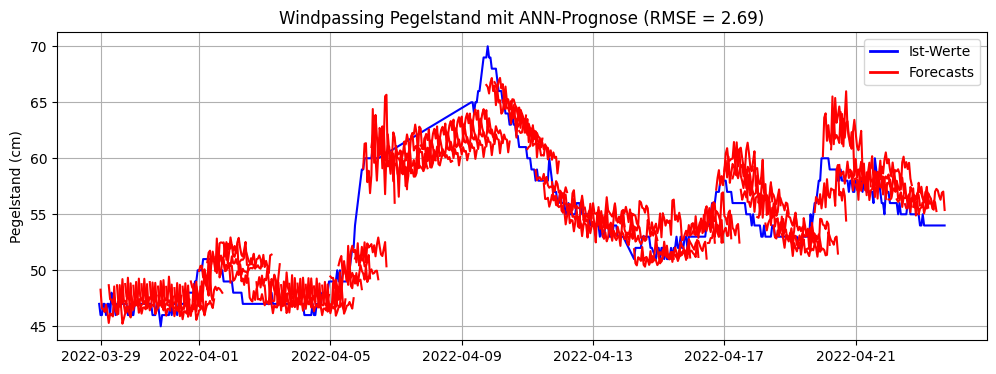

In [ ]:
plt.title('Windpassing Pegelstand mit ANN-Prognose (RMSE = ' + str(round(rmse,2))+ ')' )
plt.plot(df[ (df.index >= train_start + train_len) & (df.index <= train_start + train_len + interval*(trials-1) + horizon)].p, color = colors[0] )
for i in range(len(y_test_prediction_series) // interval_nr + 1):
  plt.plot(predictions_list[i],     color = colors[1])
plt.ylabel('Pegelstand')

lines = [Line2D([0], [0], color=c, linewidth=2, linestyle='-') for c in colors]
labels = ['Ist-Werte', 'Forecasts']
plt.legend(lines, labels)
plt.ylabel('Pegelstand (cm)')

# **<font size="+3">6 Forecasting - multivariat</font>**

Idee: Forecast der Pegelstände auf Basis der Pegelstände vorgelagerter Messstationen und aufgrund Regenfälle im Einzugsgebiet.

## **<font size="+2">6.1 Analyse und Mergen</font>**

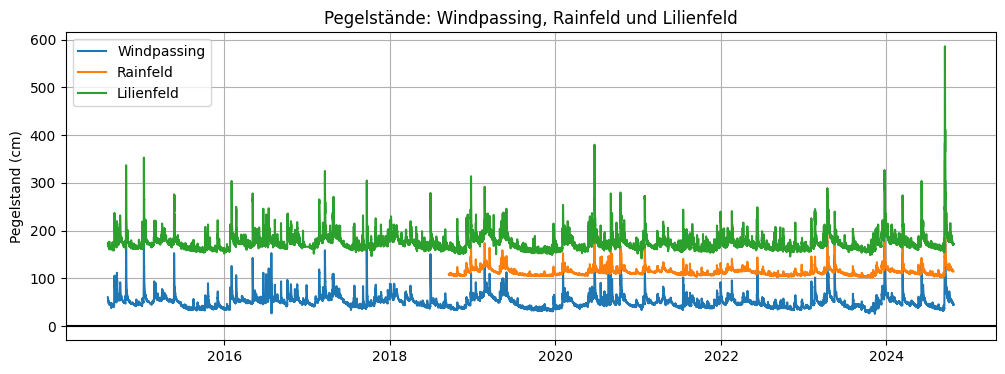

In [ ]:
plt.ylabel('Pegelstand (cm)')
plt.title('Pegelstände: Windpassing, Rainfeld und Lilienfeld')
plt.axhline(0, color='black')
for i in range(len(dfs)):
  df = dfs[stations[i]]
  plt.plot(df.index, df.p, label= stations[i])
#plt.ylim(0,300)
plt.legend();

**Kreuzkorrelation**

https://stackoverflow.com/questions/63491991/how-to-use-the-ccf-method-in-the-statsmodels-library

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import ccf

## **<font size="+2">6.2 Erzeugen multivariate Zeitreihe</font>**

In [ ]:
df = pd.merge(dfs[stations[0]], dfs[stations[1]], left_index=True, right_index=True)
df = pd.merge(df, dfs[stations[2]], left_index=True, right_index=True)
df = pd.merge(df, spartacus_h, left_index=True, right_index=True)
cols = ['wp0', 'rf0', 'lf0']
cols.extend(['RR0', 'TM0', 'SA0'])
df.columns = cols
df.head(3)

wp0    rf0    lf0  RR0        TM0      SA0
2018-09-17 13:00:00  41.0  109.0  162.0  0.0  17.341458  31882.0
2018-09-17 14:00:00  41.0  109.0  162.0  0.0  17.341458  31882.0
2018-09-17 15:00:00  41.0  109.0  162.0  0.0  17.341458  31882.0

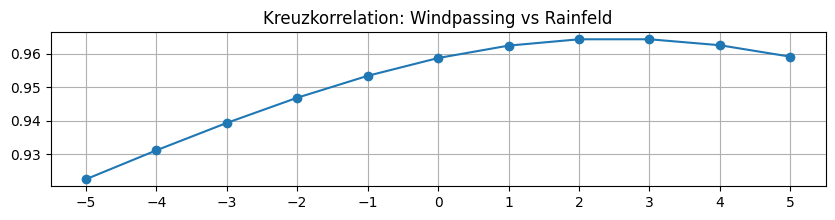

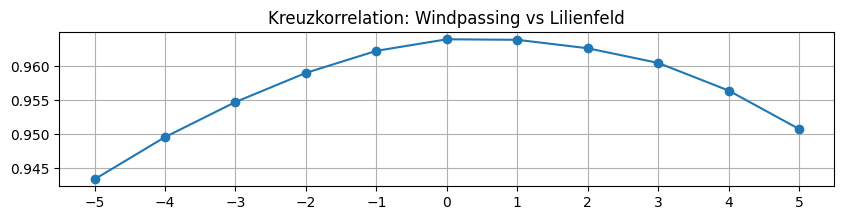

In [ ]:
nlags = 6
backwards = ccf(df['wp0'][::-1], df['rf0'][::-1], nlags = nlags, adjusted=False)[::-1]
forwards  = ccf(df['wp0'], df['rf0'], nlags = nlags, adjusted=False)
ccf_output = np.r_[backwards[:-1], forwards]
fig = plt.figure(figsize=(10, 2))
plt.plot( range(-nlags+1, nlags), ccf_output, '-o')
plt.title('Kreuzkorrelation: ' +str(stations[0]) + ' vs ' + str(stations[1]))
plt.xticks(range(-nlags+1,nlags));

backwards = ccf(df['wp0'][::-1], df['lf0'][::-1], nlags = nlags, adjusted=False)[::-1]
forwards  = ccf(df['wp0'], df['lf0'], nlags = nlags, adjusted=False)
ccf_output = np.r_[backwards[:-1], forwards]
fig = plt.figure(figsize=(10, 2))
plt.plot( range(-nlags+1, nlags), ccf_output, '-o')
plt.title('Kreuzkorrelation: ' +str(stations[0]) + ' vs ' + str(stations[2]))
plt.xticks(range(-nlags+1,nlags));

## **<font size="+2">6.3 Lineare Regression</font>**

In [ ]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

**Feature Engineering: Auswahl welche Variablen verwendet werden**

In [ ]:
# Werte
# -1: Variable wird nicht berücksichtigt
#  0: Variable wird ohne Lag berücksichtigt
#  1: Variable wird ohne Lag und mit Lag 1 wird berücksichtigt

wp =  0   # Pegel Windpassing
rf =  0   # Rainfeld
lf = -1   # Lilienfeld
RR = -1   # Niederschlag
TM = -1   # Temperatur
SA = -1   # Sonnenscheinstunden

In [ ]:
df_LR = df.copy()

if wp == -1:
  df_LR = df_LR.drop('wp0', axis=1)
if rf == -1:
  df_LR = df_LR.drop('rf0', axis=1)
if lf == -1:
  df_LR = df_LR.drop('lf0', axis=1)
if RR == -1:
  df_LR = df_LR.drop('RR0', axis=1)
if TM == -1:
  df_LR = df_LR.drop('TM0', axis=1)
if SA == -1:
  df_LR = df_LR.drop('SA0', axis=1)

In [ ]:
for i in range(wp):
  df_LR['wp' + str(i+1)] = df_LR.wp0.shift(i+1)
for i in range(rf):
  df_LR['rf' + str(i+1)] = df_LR.rf0.shift(i+1)
for i in range(lf):
  df_LR['lf' + str(i+1)] = df_LR.lf0.shift(i+1)
for i in range(RR):
  df_LR['RR' + str(i+1)] = df_LR.RR0.shift(i+1)
for i in range(TM):
  df_LR['TM' + str(i+1)] = df_LR.TM0.shift(i+1)
for i in range(SA):
  df_LR['SA' + str(i+1)] = df_LR.SA0.shift(i+1)
df_LR.head(4)

wp0    rf0
2018-09-17 13:00:00  41.0  109.0
2018-09-17 14:00:00  41.0  109.0
2018-09-17 15:00:00  41.0  109.0
2018-09-17 16:00:00  40.0  109.0

**Zusammenstellung der perfekten Forecasts zu einem Zeitpunkt**

In [ ]:
df_y = df.wp0.to_frame().copy()
for i in range(24):
  if i < 9:
    colname = 'y0' + str(i+1)
  else:
    colname = 'y' + str(i+1)
  df_y[colname] = df_y.wp0.shift(-1-i)
df_y = df_y.drop('wp0', axis=1)
df_y.head(3)

y01   y02   y03   y04   y05   y06   y07   y08   y09  \
2018-09-17 13:00:00  41.0  41.0  40.0  40.0  40.0  40.0  40.0  39.0  39.0   
2018-09-17 14:00:00  41.0  40.0  40.0  40.0  40.0  40.0  39.0  39.0  39.0   
2018-09-17 15:00:00  40.0  40.0  40.0  40.0  40.0  39.0  39.0  39.0  39.0   

                      y10  ...   y15   y16   y17   y18   y19   y20   y21  \
2018-09-17 13:00:00  39.0  ...  40.0  40.0  40.0  40.0  40.0  40.0  40.0   
2018-09-17 14:00:00  39.0  ...  40.0  40.0  40.0  40.0  40.0  40.0  40.0   
2018-09-17 15:00:00  39.0  ...  40.0  40.0  40.0  40.0  40.0  40.0  41.0   

                      y22   y23   y24  
2018-09-17 13:00:00  40.0  41.0  41.0  
2018-09-17 14:00:00  41.0  41.0  41.0  
2018-09-17 15:00:00  41.0  41.0  41.0  

[3 rows x 24 columns]

In [ ]:
X_train = df_LR[(df_LR.index >= train_start) & (df_LR.index <= train_end)].copy()
X_train = sm.add_constant(X_train)
y_train = df_y[(df_y.index >= train_start) & (df_y.index <= train_end)].copy()

X_test  = df_LR[(df_LR.index >= test_start) & (df_LR.index <= test_end + (trials-1)*interval)].copy()
X_test = sm.add_constant(X_test)
y_test  = df_y[(df_y.index >= test_start) & (df_y.index <= test_end + (trials-1)*interval)].copy()

In [ ]:
X_train.head(3)

const   wp0    rf0
2021-12-29 00:00:00    1.0  50.0  112.0
2021-12-29 01:00:00    1.0  50.0  113.0
2021-12-29 02:00:00    1.0  51.0  113.0

In [ ]:
y_train.head(3)

y01   y02   y03   y04   y05   y06   y07   y08   y09  \
2021-12-29 00:00:00  50.0  51.0  51.0  51.0  52.0  52.0  52.0  52.0  53.0   
2021-12-29 01:00:00  51.0  51.0  51.0  52.0  52.0  52.0  52.0  53.0  53.0   
2021-12-29 02:00:00  51.0  51.0  52.0  52.0  52.0  52.0  53.0  53.0  54.0   

                      y10  ...   y15   y16   y17   y18   y19   y20   y21  \
2021-12-29 00:00:00  53.0  ...  60.0  64.0  68.0  75.0  81.0  85.0  90.0   
2021-12-29 01:00:00  54.0  ...  64.0  68.0  75.0  81.0  85.0  90.0  91.0   
2021-12-29 02:00:00  55.0  ...  68.0  75.0  81.0  85.0  90.0  91.0  92.0   

                      y22   y23   y24  
2021-12-29 00:00:00  91.0  92.0  92.0  
2021-12-29 01:00:00  92.0  92.0  91.0  
2021-12-29 02:00:00  92.0  91.0  91.0  

[3 rows x 24 columns]

In [ ]:
models = []
for col in df_y.columns:
  model = sm.OLS(y_train[col], X_train).fit()
  models.append(model)

In [ ]:
print(models[20].summary2()  )

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.679     
Dependent Variable: y21              AIC:                13292.8302
Date:               2025-06-23 17:16 BIC:                13309.8638
No. Observations:   2160             Log-Likelihood:     -6643.4   
Df Model:           2                F-statistic:        2287.     
Df Residuals:       2157             Prob (F-statistic): 0.00      
R-squared:          0.680            Scale:              27.518    
---------------------------------------------------------------------
            Coef.    Std.Err.      t      P>|t|     [0.025     0.975]
---------------------------------------------------------------------
const      -9.9863     4.3660   -2.2873   0.0223   -18.5484   -1.4243
wp0         0.7220     0.0246   29.3920   0.0000     0.6739    0.7702
rf0         0.2122     0.0466    4.5525   0.0000     0.1208    0.3036
------------------------------------------------------

In [ ]:
result = pd.DataFrame()

for i in range(24):
  if i < 9:
    col = 'H0' + str(i+1)
  else:
    col = 'H' + str(i+1)
  result[col] = models[i].predict(X_test)
result.head(3)

H01        H02        H03        H04        H05  \
2022-03-29 00:00:00  46.247828  46.469848  46.671445  46.871675  47.064015   
2022-03-29 01:00:00  46.247828  46.469848  46.671445  46.871675  47.064015   
2022-03-29 02:00:00  47.213937  47.405670  47.579883  47.753105  47.919628   

                           H06        H07        H08        H09        H10  \
2022-03-29 00:00:00  47.230049  47.364965  47.485168  47.591068  47.673243   
2022-03-29 01:00:00  47.230049  47.364965  47.485168  47.591068  47.673243   
2022-03-29 02:00:00  48.063522  48.180601  48.284992  48.377222  48.448842   

                     ...        H15        H16        H17       H18  \
2022-03-29 00:00:00  ...  47.871801  47.890521  47.920105  47.94728   
2022-03-29 01:00:00  ...  47.871801  47.890521  47.920105  47.94728   
2022-03-29 02:00:00  ...  48.622605  48.638899  48.664321  48.68740   

                           H19        H20        H21        H22        H23  \
2022-03-29 00:00:00  47.978967  48.014382  48.052847  48.099152  48.138880   
2022-03-29 01:00:00  47.978967  48.014382  48.052847  48.099152  48.138880   
2022-03-29 02:00:00  48.713901  48.743239  48.774891  48.812982  48.845384   

                           H24  
2022-03-29 00:00:00  48.173445  
2022-03-29 01:00:00  48.173445  
2022-03-29 02:00:00  48.873185  

[3 rows x 24 columns]

In [ ]:
predictions_list = []
errors_list = []
for i in range(len(result) // interval_nr):
  predictions = pd.DataFrame()
  start = result.index[i*interval_nr] + timedelta(hours=1)
  ende = result.index[i*interval_nr] + horizon
  times = pd.date_range(start = start, end = ende, freq = 'h')
  values = result.iloc[i*interval_nr].values
  predictions = pd.DataFrame(values, index = times)
  predictions_list.append(predictions)
  temp = pd.merge(df, predictions, left_index=True, right_index=True)
  errors = ((temp.wp0 - temp.iloc[:,-1])**2).to_list()
  errors_list.append(errors)
errors_flat = [x for xs in errors_list for x in xs]
rmse = np.sqrt(sum(errors_flat) / len (errors_flat)).item()
print(f'RMSE = {rmse:.2f}')

RMSE = 2.07


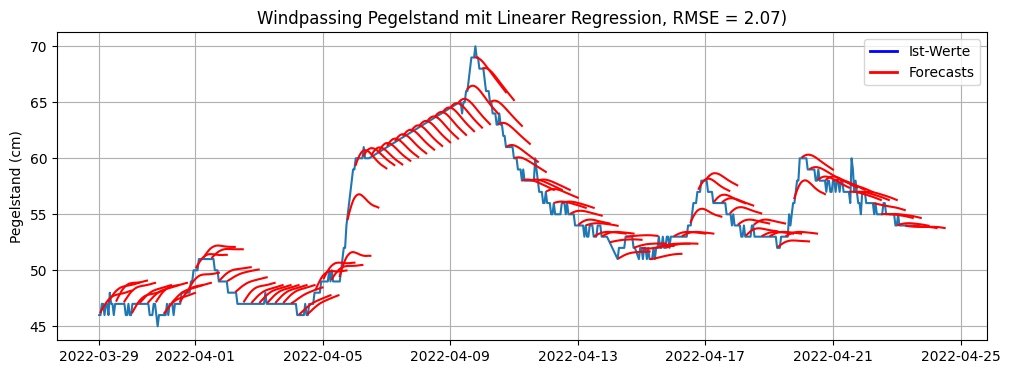

In [ ]:
plt.title('Windpassing Pegelstand mit Linearer Regression, RMSE = ' + str(round(rmse,2))+ ')' )
plt.plot(X_test.index, X_test.wp0)
for i in range(len(result) // interval_nr):
  plt.plot(predictions_list[i],     color = colors[1])
plt.ylabel('Pegelstand')

lines = [Line2D([0], [0], color=c, linewidth=2, linestyle='-') for c in colors]
labels = ['Ist-Werte', 'Forecasts']
plt.legend(lines, labels)
plt.ylabel('Pegelstand (cm)');

## **<font size="+2">6.4 XGBoost</font>**

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import plot_importance, plot_tree

In [ ]:
# Werte
# -1: Variable wird nicht berücksichtigt
#  0: Variable wird ohne Lag berücksichtigt
#  1: Variable wird ohne Lag und mit Lag 1 wird berücksichtigt

wp =  0   # Pegel Windpassing
rf =  0   # Rainfeld
lf =  -1   # Lilienfeld
RR =  -1   # Niederschlag
TM =  -1   # Temperatur
SA =  -1   # Sonnenscheinstunden

In [ ]:
df_XG = df.copy()

if wp == -1:
  df_XG = df_XG.drop('wp0', axis=1)
if rf == -1:
  df_XG = df_XG.drop('rf0', axis=1)
if lf == -1:
  df_XG = df_XG.drop('lf0', axis=1)
if RR == -1:
  df_XG = df_XG.drop('RR0', axis=1)
if TM == -1:
  df_XG = df_XG.drop('TM0', axis=1)
if SA == -1:
  df_XG = df_XG.drop('SA0', axis=1)

In [ ]:
for i in range(wp):
  df_XG['wp' + str(i+1)] = df_XG.wp0.shift(i+1)
for i in range(rf):
  df_XG['rf' + str(i+1)] = df_XG.rf0.shift(i+1)
for i in range(lf):
  df_XG['lf' + str(i+1)] = df_XG.lf0.shift(i+1)
for i in range(RR):
  df_XG['RR' + str(i+1)] = df_XG.RR0.shift(i+1)
for i in range(TM):
  df_XG['TM' + str(i+1)] = df_XG.TM0.shift(i+1)
for i in range(SA):
  df_XG['SA' + str(i+1)] = df_XG.SA0.shift(i+1)
df_XG.head(4)

wp0    rf0
2018-09-17 13:00:00  41.0  109.0
2018-09-17 14:00:00  41.0  109.0
2018-09-17 15:00:00  41.0  109.0
2018-09-17 16:00:00  40.0  109.0

In [ ]:
df_y = df.wp0.to_frame().copy()
for i in range(24):
  if i < 9:
    colname = 'y0' + str(i+1)
  else:
    colname = 'y' + str(i+1)
  df_y[colname] = df_y.wp0.shift(-1-i)
df_y = df_y.drop('wp0', axis=1)
df_y.head(3)

y01   y02   y03   y04   y05   y06   y07   y08   y09  \
2018-09-17 13:00:00  41.0  41.0  40.0  40.0  40.0  40.0  40.0  39.0  39.0   
2018-09-17 14:00:00  41.0  40.0  40.0  40.0  40.0  40.0  39.0  39.0  39.0   
2018-09-17 15:00:00  40.0  40.0  40.0  40.0  40.0  39.0  39.0  39.0  39.0   

                      y10  ...   y15   y16   y17   y18   y19   y20   y21  \
2018-09-17 13:00:00  39.0  ...  40.0  40.0  40.0  40.0  40.0  40.0  40.0   
2018-09-17 14:00:00  39.0  ...  40.0  40.0  40.0  40.0  40.0  40.0  40.0   
2018-09-17 15:00:00  39.0  ...  40.0  40.0  40.0  40.0  40.0  40.0  41.0   

                      y22   y23   y24  
2018-09-17 13:00:00  40.0  41.0  41.0  
2018-09-17 14:00:00  41.0  41.0  41.0  
2018-09-17 15:00:00  41.0  41.0  41.0  

[3 rows x 24 columns]

In [ ]:
X_train = df_XG[(df_XG.index >= train_start) & (df_XG.index <= train_end)].copy()
X_train = sm.add_constant(X_train)
y_train = df_y[(df_y.index >= train_start) & (df_y.index <= train_end)].copy()

X_test  = df_XG[(df_XG.index >= test_start) & (df_XG.index <= test_end + (trials-1)*interval)].copy()
X_test = sm.add_constant(X_test)
y_test  = df_y[(df_y.index >= test_start) & (df_y.index <= test_end + (trials-1)*interval)].copy()

In [ ]:
X_train.head(3)

const   wp0    rf0    lf0       RR0       TM0  SA0   wp1  \
2021-12-29 00:00:00    1.0  50.0  112.0  172.0  0.667147  3.428264  0.0  50.0   
2021-12-29 01:00:00    1.0  50.0  113.0  172.0  0.667147  3.428264  0.0  50.0   
2021-12-29 02:00:00    1.0  51.0  113.0  172.0  0.667147  3.428264  0.0  50.0   

                      wp2    lf1    lf2    lf3  
2021-12-29 00:00:00  50.0  175.0  173.0  175.0  
2021-12-29 01:00:00  50.0  172.0  175.0  173.0  
2021-12-29 02:00:00  50.0  172.0  172.0  175.0

In [ ]:
y_train.head(3)

y01   y02   y03   y04   y05   y06   y07   y08   y09  \
2021-12-29 00:00:00  50.0  51.0  51.0  51.0  52.0  52.0  52.0  52.0  53.0   
2021-12-29 01:00:00  51.0  51.0  51.0  52.0  52.0  52.0  52.0  53.0  53.0   
2021-12-29 02:00:00  51.0  51.0  52.0  52.0  52.0  52.0  53.0  53.0  54.0   

                      y10  ...   y15   y16   y17   y18   y19   y20   y21  \
2021-12-29 00:00:00  53.0  ...  60.0  64.0  68.0  75.0  81.0  85.0  90.0   
2021-12-29 01:00:00  54.0  ...  64.0  68.0  75.0  81.0  85.0  90.0  91.0   
2021-12-29 02:00:00  55.0  ...  68.0  75.0  81.0  85.0  90.0  91.0  92.0   

                      y22   y23   y24  
2021-12-29 00:00:00  91.0  92.0  92.0  
2021-12-29 01:00:00  92.0  92.0  91.0  
2021-12-29 02:00:00  92.0  91.0  91.0  

[3 rows x 24 columns]

In [ ]:
models = []
for col in df_y.columns:
  model = XGBRegressor(objective = 'reg:squarederror' , random_state = 42 )
  model.fit(X_train, y_train[col])
  models.append(model)
  print(f'Modell mit {col} ist trainiert.')

Modell mit y01 ist trainiert.
Modell mit y02 ist trainiert.
Modell mit y03 ist trainiert.
Modell mit y04 ist trainiert.
Modell mit y05 ist trainiert.
Modell mit y06 ist trainiert.
Modell mit y07 ist trainiert.
Modell mit y08 ist trainiert.
Modell mit y09 ist trainiert.
Modell mit y10 ist trainiert.
Modell mit y11 ist trainiert.
Modell mit y12 ist trainiert.
Modell mit y13 ist trainiert.
Modell mit y14 ist trainiert.
Modell mit y15 ist trainiert.
Modell mit y16 ist trainiert.
Modell mit y17 ist trainiert.
Modell mit y18 ist trainiert.
Modell mit y19 ist trainiert.
Modell mit y20 ist trainiert.
Modell mit y21 ist trainiert.
Modell mit y22 ist trainiert.
Modell mit y23 ist trainiert.
Modell mit y24 ist trainiert.


In [ ]:
result = pd.DataFrame()

for i in range(24):
  if i < 9:
    col = 'H0' + str(i+1)
  else:
    col = 'H' + str(i+1)
  result[col] = models[i].predict(X_test)
result.index = y_test.index
result.head(3)

H01        H02        H03        H04        H05  \
2022-03-29 00:00:00  45.815468  45.720901  45.814522  45.815083  45.726452   
2022-03-29 01:00:00  45.815468  45.720901  45.814522  45.815083  45.726452   
2022-03-29 02:00:00  46.692257  46.655510  46.946041  47.083096  46.973076   

                           H06        H07        H08        H09        H10  \
2022-03-29 00:00:00  45.697182  45.731472  45.707607  45.675545  45.686005   
2022-03-29 01:00:00  45.697182  45.731472  45.707607  45.675545  45.686005   
2022-03-29 02:00:00  47.075745  47.124237  47.160103  47.204617  47.260738   

                     ...        H15        H16        H17        H18  \
2022-03-29 00:00:00  ...  45.774654  45.826279  45.712715  45.714760   
2022-03-29 01:00:00  ...  45.774654  45.826279  45.712715  45.714760   
2022-03-29 02:00:00  ...  47.212124  47.149780  47.176823  47.071358   

                           H19        H20        H21        H22        H23  \
2022-03-29 00:00:00  45.797169  45.842949  45.850826  45.835499  45.936279   
2022-03-29 01:00:00  45.797169  45.842949  45.850826  45.835499  45.936279   
2022-03-29 02:00:00  47.011387  47.032108  46.896690  46.817883  46.833546   

                           H24  
2022-03-29 00:00:00  45.951321  
2022-03-29 01:00:00  45.951321  
2022-03-29 02:00:00  46.638271  

[3 rows x 24 columns]

In [ ]:
y_test.head(3)

y01   y02   y03   y04   y05   y06   y07   y08   y09  \
2022-03-29 00:00:00  46.0  47.0  47.0  46.0  47.0  47.0  46.0  48.0  47.0   
2022-03-29 01:00:00  47.0  47.0  46.0  47.0  47.0  46.0  48.0  47.0  47.0   
2022-03-29 02:00:00  47.0  46.0  47.0  47.0  46.0  48.0  47.0  47.0  46.0   

                      y10  ...   y15   y16   y17   y18   y19   y20   y21  \
2022-03-29 00:00:00  47.0  ...  47.0  47.0  47.0  47.0  47.0  46.0  46.0   
2022-03-29 01:00:00  46.0  ...  47.0  47.0  47.0  47.0  46.0  46.0  47.0   
2022-03-29 02:00:00  47.0  ...  47.0  47.0  47.0  46.0  46.0  47.0  46.0   

                      y22   y23   y24  
2022-03-29 00:00:00  47.0  46.0  46.0  
2022-03-29 01:00:00  46.0  46.0  47.0  
2022-03-29 02:00:00  46.0  47.0  47.0  

[3 rows x 24 columns]

In [ ]:
predictions_list = []
errors_list = []
for i in range(len(result) // interval_nr):
  predictions = pd.DataFrame()
  start = result.index[i*interval_nr] + timedelta(hours=1)
  ende = result.index[i*interval_nr] + horizon
  times = pd.date_range(start = start, end = ende, freq = 'h')
  values = result.iloc[i*interval_nr].values
  predictions = pd.DataFrame(values, index = times)
  predictions_list.append(predictions)
  temp = pd.merge(df, predictions, left_index=True, right_index=True)
  errors = ((temp.wp0 - temp.iloc[:,-1])**2).to_list()
  errors_list.append(errors)
errors_flat = [x for xs in errors_list for x in xs]
rmse = np.sqrt(sum(errors_flat) / len (errors_flat)).item()
print(f'RMSE = {rmse:.2f}')

RMSE = 6.49


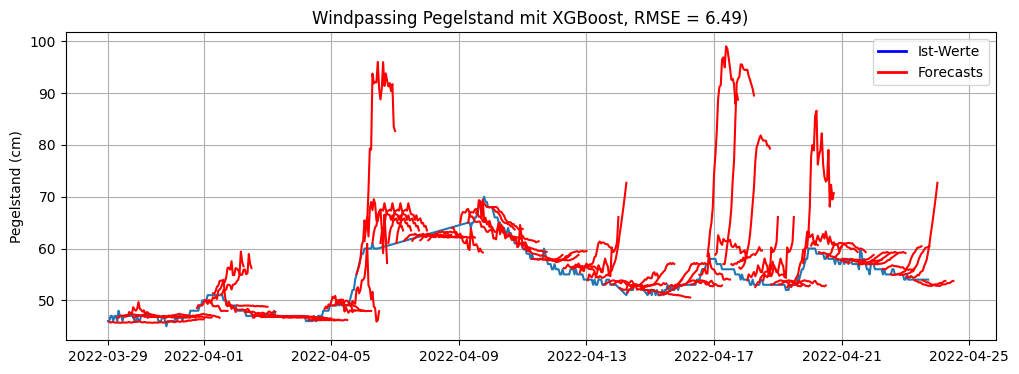

In [ ]:
plt.title('Windpassing Pegelstand mit XGBoost, RMSE = ' + str(round(rmse,2))+ ')' )
plt.plot(X_test.index, X_test.wp0)
for i in range(len(result) // interval_nr):
  plt.plot(predictions_list[i],     color = colors[1])
plt.ylabel('Pegelstand')

lines = [Line2D([0], [0], color=c, linewidth=2, linestyle='-') for c in colors]
labels = ['Ist-Werte', 'Forecasts']
plt.legend(lines, labels)
plt.ylabel('Pegelstand (cm)');

<Axes: >

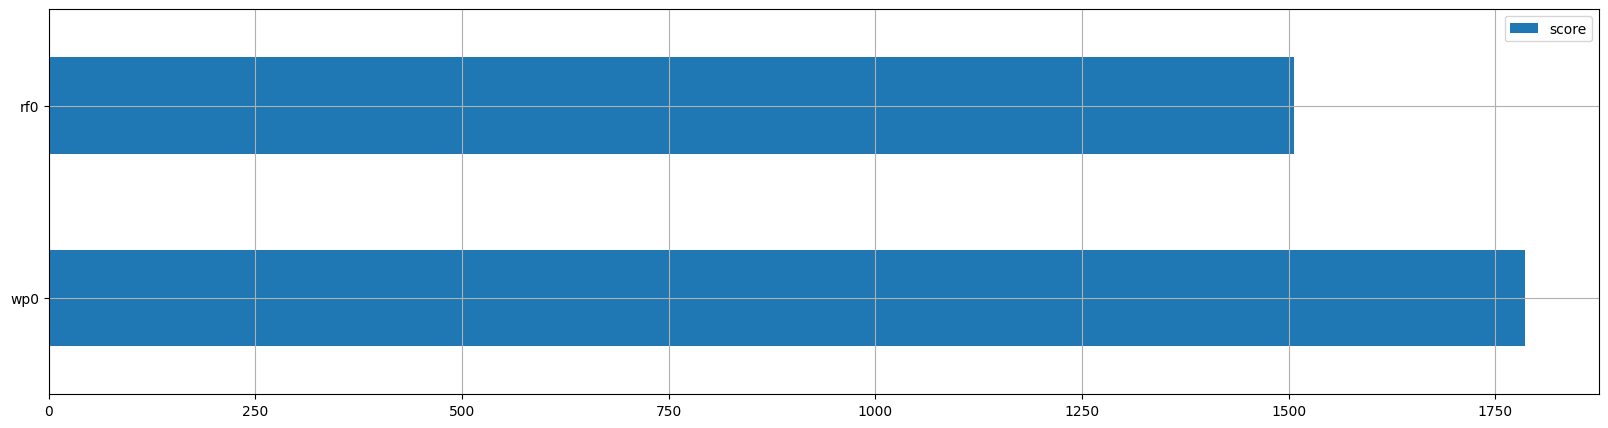

In [ ]:
# https://stackoverflow.com/questions/37627923/how-to-get-feature-importance-in-xgboost
feature_important = models[0].get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,5)) ## plot top 40 features

<Axes: >

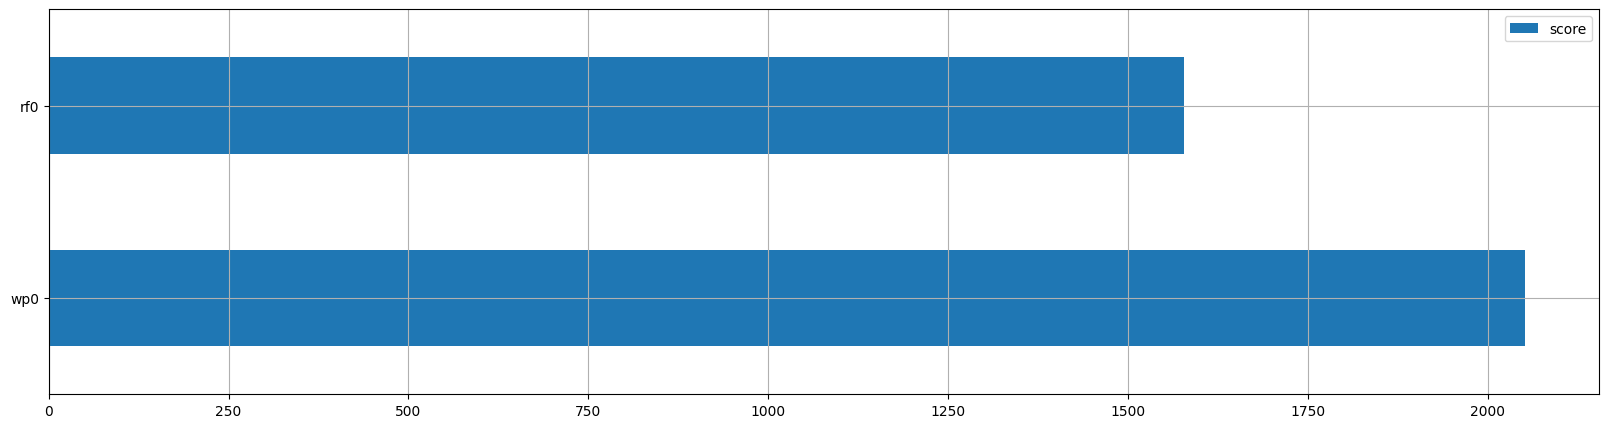

In [ ]:
feature_important = models[23].get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,5)) ## plot top 40 features